In [1]:
import pandas as pd 
import numpy as np
from collections import Counter
from numpy import quantile, where, random
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.base import TransformerMixin
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_classification
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
import category_encoders as ce
from sklearn.feature_selection import SelectKBest, f_classif  
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from scipy.stats import kendalltau
from sklearn.model_selection import cross_validate
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import plot_precision_recall_curve
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
import plotly.express as px

## Loading the Data

          id    x1     x2 x3     x4     x5     x6     x7   x8     x9  ...  \
0     PA1001  1406  145.0  F  0.005  0.000  0.002  0.000  0.0  0.000  ...   
1     PA1002   258  127.0  M  0.012  0.000  0.008  0.004  0.0  0.000  ...   
2     PA1003   479  145.0  F  0.000  0.000  0.000  0.002  0.0  0.000  ...   
3     PA1004   906  146.0  F  0.004  0.000  0.005  0.003  0.0  0.000  ...   
4     PA1005  1921  140.0  F  0.002  0.003  0.006  0.006  0.0  0.000  ...   
...      ...   ...    ... ..    ...    ...    ...    ...  ...    ...  ...   
1579  PA2580  2077  130.0  M  0.005  0.001  0.001  0.000  0.0  0.000  ...   
1580  PA2581   664  138.0  F  0.000  0.003  0.003  0.000  0.0  0.002  ...   
1581  PA2582  1431  144.0  F  0.000  0.000  0.006  0.000  0.0  0.000  ...   
1582  PA2583   630  134.0  F  0.017  0.002  0.004  0.000  0.0  0.000  ...   
1583  PA2584   436  151.0  F  0.000  0.000  0.006  0.006  0.0  0.000  ...   

        x16    x17   x18  x19    x20    x21    x22   x23  x24         targe

Count  Percentage
High risk        130    8.207071
Low risk        1235   77.967172
Moderate risk    219   13.825758

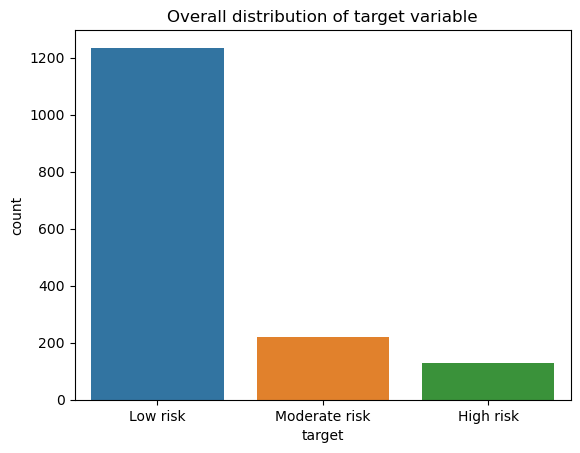

In [2]:
Health_train_data_path = "/Users/miguelrosales/Documents/UEA/Computer Science/Data Mining /Summative II/health_train.csv"

Health_train_data = pd.read_csv(Health_train_data_path)
Health_train_2 = Health_train_data.copy
print(Health_train_data)

#Show distribution of the target variable of the whole Health_train_data 
sns.countplot(x= 'target', data=Health_train_data).set(title='Overall distribution of target variable')

target_counts = Health_train_data['target'].value_counts()
target_percentage = Health_train_data['target'].value_counts(normalize=True) * 100

# Create a DataFrame to display the results
data_dis = pd.DataFrame({'Count': target_counts, 'Percentage': target_percentage})
data_dis = data_dis.sort_index()

# Display the result
data_dis

## Dividing Data into Categorical and Numerical

In [3]:
columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24']
categorical = ['x3', 'x14']
numerical = ['x1', 'x2', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24']
print(Health_train_data[categorical])
Health_train_data[numerical]

     x3 x14
0     F  O+
1     M  A+
2     F  O+
3     F  O+
4     F  B+
...  ..  ..
1579  M  B-
1580  F  B+
1581  F  O-
1582  F  A+
1583  F  A+

[1584 rows x 2 columns]


x1     x2     x4     x5     x6     x7   x8     x9   x10  x11  ...  \
0     1406  145.0  0.005  0.000  0.002  0.000  0.0  0.000  46.0  0.8  ...   
1      258  127.0  0.012  0.000  0.008  0.004  0.0  0.000  13.0  3.8  ...   
2      479  145.0  0.000  0.000  0.000  0.002  0.0  0.000  57.0  0.5  ...   
3      906  146.0  0.004  0.000  0.005  0.003  0.0  0.000  29.0  1.2  ...   
4     1921  140.0  0.002  0.003  0.006  0.006  0.0  0.000  62.0  1.6  ...   
...    ...    ...    ...    ...    ...    ...  ...    ...   ...  ...  ...   
1579  2077  130.0  0.005  0.001  0.001  0.000  0.0  0.000  72.0  0.9  ...   
1580   664  138.0  0.000  0.003  0.003  0.000  0.0  0.002  60.0  1.0  ...   
1581  1431  144.0  0.000  0.000  0.006  0.000  0.0  0.000  45.0  0.7  ...   
1582   630  134.0  0.017  0.002  0.004  0.000  0.0  0.000  48.0  2.2  ...   
1583   436  151.0  0.000  0.000  0.006  0.006  0.0  0.000  64.0  1.1  ...   

        x15    x16    x17   x18  x19    x20    x21    x22   x23  x24  
0      67.0  104.0  171.0   4.0  0.0  155.0  153.0  154.0   4.0  1.0  
1     138.0   53.0  191.0  12.0  1.0  133.0  126.0  131.0  41.0  0.0  
2      46.0  111.0  157.0   1.0  1.0  150.0  146.0  149.0   6.0  1.0  
3      62.0  107.0  169.0   2.0  2.0  150.0  147.0  149.0   7.0  0.0  
4     153.0   75.0  228.0   9.0  0.0  142.0  118.0  142.0  20.0  0.0  
...     ...    ...    ...   ...  ...    ...    ...    ...   ...  ...  
1579   31.0  127.0  158.0   2.0  0.0  139.0  139.0  140.0   3.0  0.0  
1580  118.0   69.0  187.0  10.0  1.0  142.0  130.0  140.0  61.0  0.0  
1581   30.0  139.0  169.0   2.0  0.0  157.0  155.0  157.0   2.0  0.0  
1582  120.0   50.0  170.0   5.0  0.0  160.0  150.0  155.0  28.0  1.0  
1583  150.0   50.0  200.0  11.0  2.0  156.0  150.0  156.0  38.0  1.0  

[1584 rows x 22 columns]

### Summary Statistics of Categorical Columns

In [4]:
sumCat = Health_train_data[categorical]
sumCatDes = Health_train_data[categorical].describe()

for column in categorical:
    sumCatDes.loc['missing',column] = Health_train_data[column].isnull().sum()
    sumCatDes.loc['values',column] = Health_train_data[column].unique()

sumCatDes

x3                                 x14
count      1584                                1584
unique        2                                   8
top           M                                  O+
freq        842                                 410
missing       0                                   0
values   [F, M]  [O+, A+, B+, O-, A-, B-, AB-, AB+]

#### Combination of Gender and Blood type to see distribution with target variable

In [5]:
groupVar = ['x3', 'x14', 'target']
grouped = Health_train_data.groupby(groupVar).size()

sumComb = grouped.to_frame(name='count').reset_index()
sumCombDes = sumComb.describe()

print(sumComb)
sumCombDes

   x3  x14         target  count
0   F   A+      High risk      3
1   F   A+       Low risk     79
2   F   A+  Moderate risk     18
3   F   A-       Low risk     65
4   F   A-  Moderate risk      8
5   F  AB+      High risk      5
6   F  AB+       Low risk     24
7   F  AB+  Moderate risk     28
8   F  AB-      High risk      1
9   F  AB-       Low risk     10
10  F  AB-  Moderate risk      6
11  F   B+      High risk      9
12  F   B+       Low risk     98
13  F   B+  Moderate risk     20
14  F   B-      High risk      4
15  F   B-       Low risk     61
16  F   B-  Moderate risk     34
17  F   O+      High risk      1
18  F   O+       Low risk    117
19  F   O+  Moderate risk     14
20  F   O-      High risk     19
21  F   O-       Low risk     66
22  F   O-  Moderate risk     52
23  M   A+      High risk     57
24  M   A+       Low risk    162
25  M   A+  Moderate risk      9
26  M   A-      High risk      5
27  M   A-       Low risk     82
28  M   A-  Moderate risk      5
29  M   B+

count
count   40.000000
mean    39.600000
std     55.483331
min      1.000000
25%      5.000000
50%     13.500000
75%     58.000000
max    264.000000

### Distribution of Categorical Variables

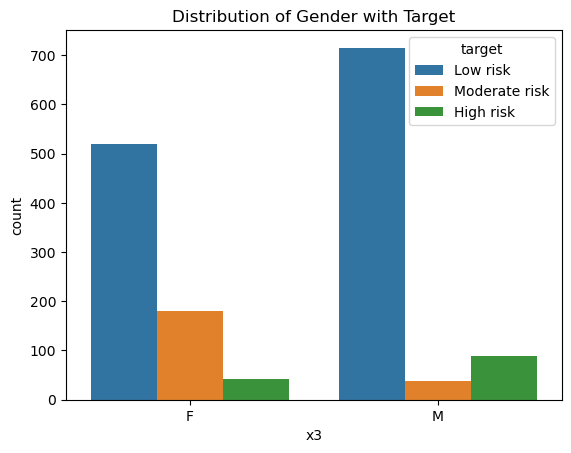

In [6]:
sns.countplot(x= 'x3', hue='target', data=Health_train_data).set(title='Distribution of Gender with Target')
title ='Distribution of Gender with Target'

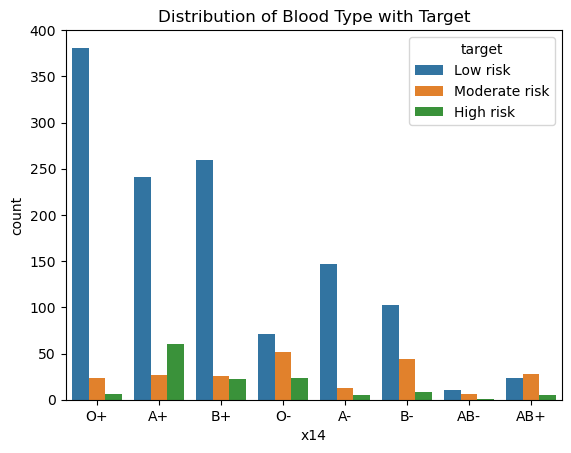

In [7]:
sns.countplot(x= 'x14', hue='target', data=Health_train_data).set(title='Distribution of Blood Type with Target')
title='Distribution of Blood Type with Target'

#### Combination of Gender and Blood type to see distribution with target variable

[Text(0.5, 1.0, 'Distibution of Gender with Blood Type')]

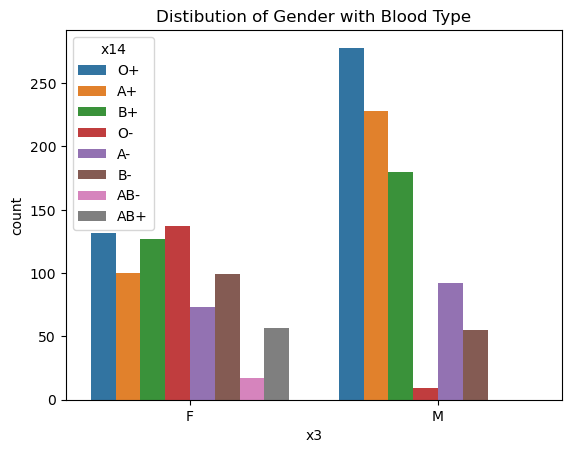

In [8]:
sns.countplot(x= 'x3', hue='x14', data=Health_train_data).set(title='Distibution of Gender with Blood Type')

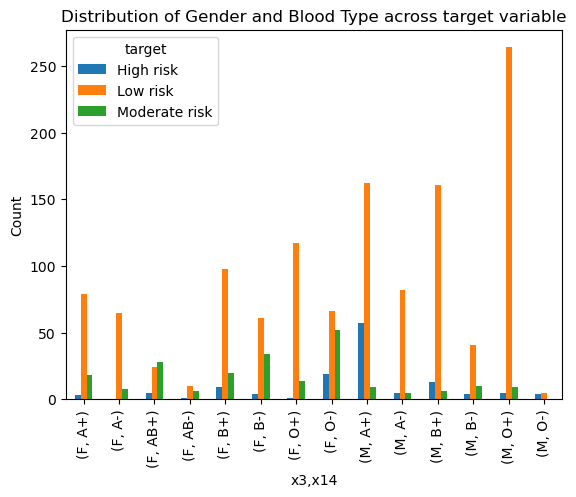

In [9]:
groupCount = Health_train_data.groupby(groupVar).size().unstack(fill_value=0)

groupCount.plot(kind='bar')
plt.ylabel('Count')
plt.title('Distribution of Gender and Blood Type across target variable')
title='Distribution of Gender and Blood Type across target variable'
plt.savefig(title+'.jpg')

### Summary Statistics of Numerical Columns

In [10]:
sumNum = Health_train_data[numerical]
sumNumDes = sumNum.describe()

for column in numerical:
    sumNumDes.loc['median',column] = Health_train_data[column].median()
    sumNumDes.loc['missing',column] = Health_train_data[column].isnull().sum()

sumNumDes

x1           x2           x4           x5           x6  \
count    1584.000000  1584.000000  1584.000000  1540.000000  1584.000000   
mean     1053.188131   133.297980     0.003169     0.009906     0.004347   
std       615.996716    10.002632     0.003821     0.048627     0.002948   
min         0.000000   106.000000     0.000000     0.000000     0.000000   
25%       523.750000   126.000000     0.000000     0.000000     0.002000   
50%      1049.500000   133.000000     0.002000     0.000000     0.004000   
75%      1583.250000   141.000000     0.006000     0.003000     0.007000   
max      2125.000000   160.000000     0.019000     0.477000     0.014000   
median   1049.500000   133.000000     0.002000     0.000000     0.004000   
missing     0.000000     0.000000     0.000000    44.000000     0.000000   

                  x7           x8           x9          x10          x11  ...  \
count    1584.000000  1567.000000  1584.000000  1557.000000  1584.000000  ...   
mean        0.001854     0.000003     0.000157    47.094412     1.337816  ...   
std         0.002940     0.000050     0.000593    17.269621     0.899092  ...   
min         0.000000     0.000000     0.000000    13.000000     0.200000  ...   
25%         0.000000     0.000000     0.000000    32.000000     0.700000  ...   
50%         0.000000     0.000000     0.000000    49.000000     1.200000  ...   
75%         0.003000     0.000000     0.000000    61.000000     1.700000  ...   
max         0.015000     0.001000     0.005000    86.000000     7.000000  ...   
median      0.000000     0.000000     0.000000    49.000000     1.200000  ...   
missing     0.000000    17.000000     0.000000    27.000000     0.000000  ...   

                 x15          x16          x17          x18          x19  \
count    1584.000000  1584.000000  1584.000000  1584.000000  1584.000000   
mean       70.409091    93.496843   163.905934     4.063763     0.324495   
std        38.993892    29.593370    17.908749     2.950268     0.718499   
min         3.000000    50.000000   122.000000     0.000000     0.000000   
25%        36.000000    67.000000   152.000000     2.000000     0.000000   
50%        68.000000    93.000000   162.000000     3.000000     0.000000   
75%       100.000000   120.000000   174.000000     6.000000     0.000000   
max       176.000000   158.000000   238.000000    18.000000    10.000000   
median     68.000000    93.000000   162.000000     3.000000     0.000000   
missing     0.000000     0.000000     0.000000     0.000000     0.000000   

                 x20          x21          x22          x23          x24  
count    1584.000000  1584.000000  1584.000000  1584.000000  1584.000000  
mean      137.333965   134.542929   137.935606    18.448232     0.309343  
std        16.461643    15.729735    14.622680    28.375002     0.615868  
min        60.000000    73.000000    77.000000     0.000000    -1.000000  
25%       128.000000   125.000000   128.000000     2.000000     0.000000  
50%       139.000000   136.000000   139.000000     7.000000     0.000000  
75%       148.000000   145.250000   148.000000    23.000000     1.000000  
max       187.000000   182.000000   186.000000   269.000000     1.000000  
median    139.000000   136.000000   139.000000     7.000000     0.000000  
missing     0.000000     0.000000     0.000000     0.000000     0.000000  

[10 rows x 22 columns]

### Distribution of Numerical Variables

In [11]:
Health_train_data_Low = Health_train_data.loc[(Health_train_data.target.str.strip()=='Low risk')]
Health_train_data_Moderate = Health_train_data.loc[(Health_train_data.target.str.strip()=='Moderate risk')]
Health_train_data_High = Health_train_data.loc[(Health_train_data.target.str.strip()=='High risk')]


/Users/miguelrosales/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/miguelrosales/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/var/folders/g5/dd0xvvm965l_rfbkt9j5blvh0000gn/T/ipykernel_39997/1596088723.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


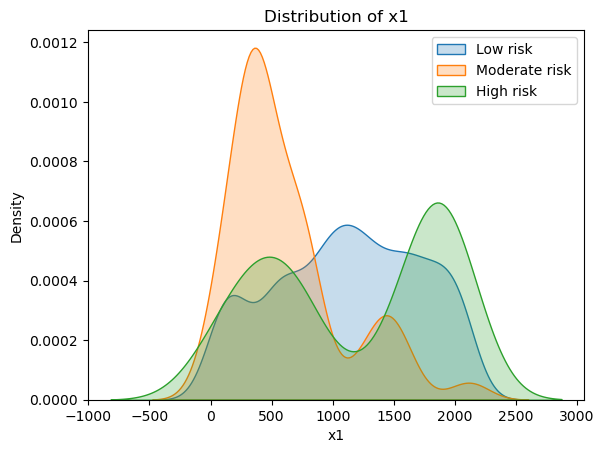

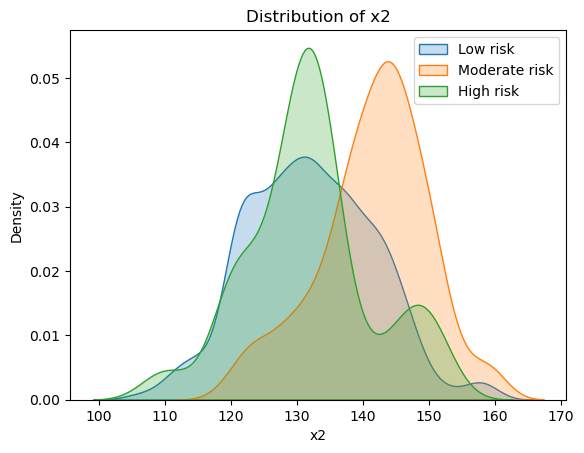

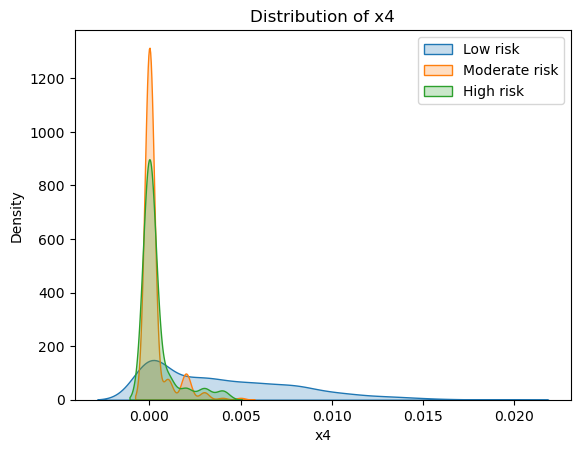

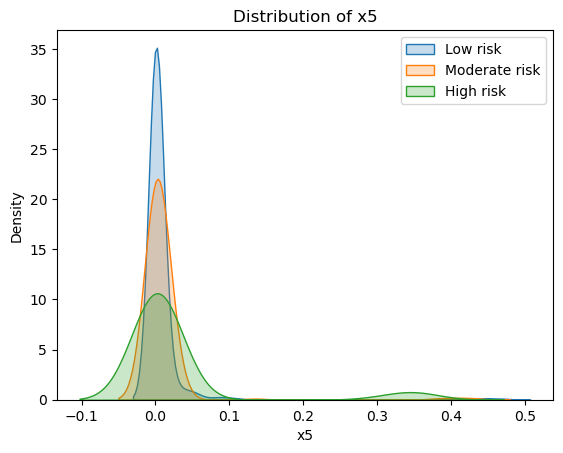

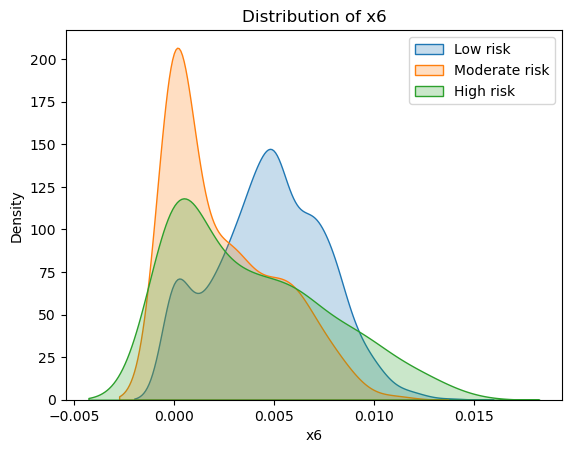

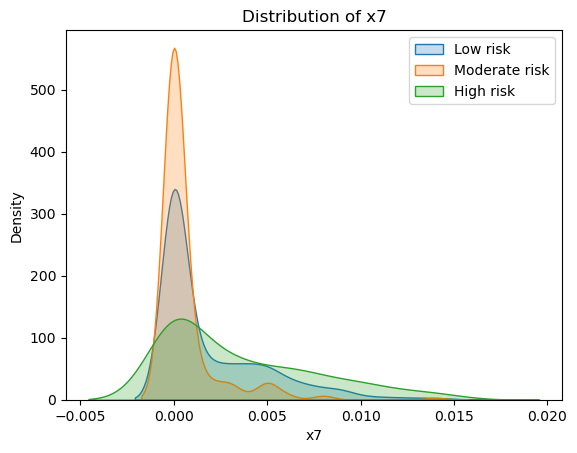

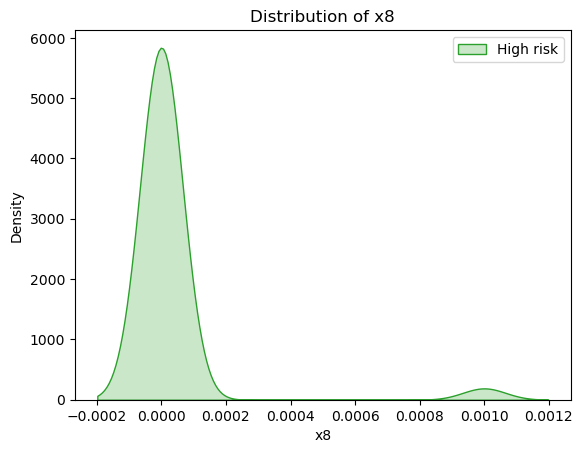

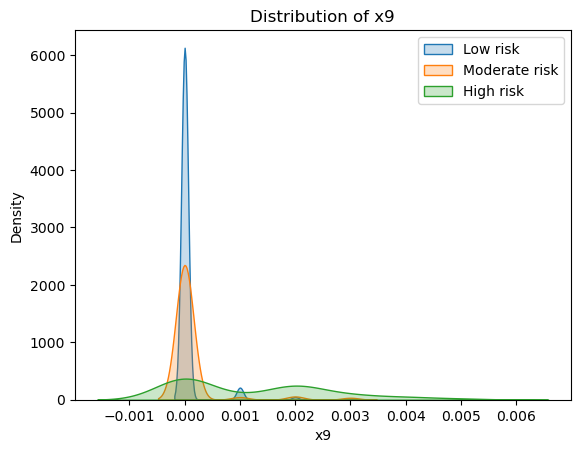

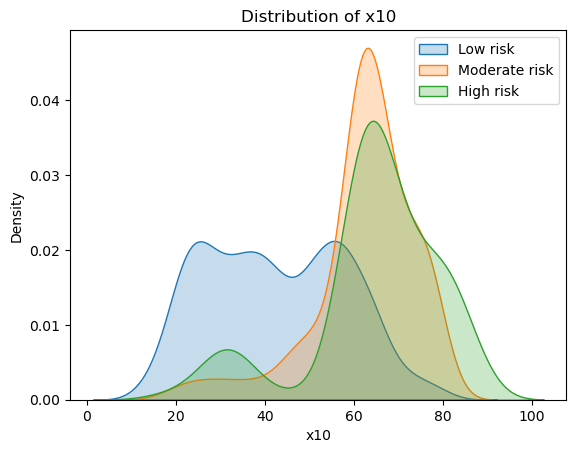

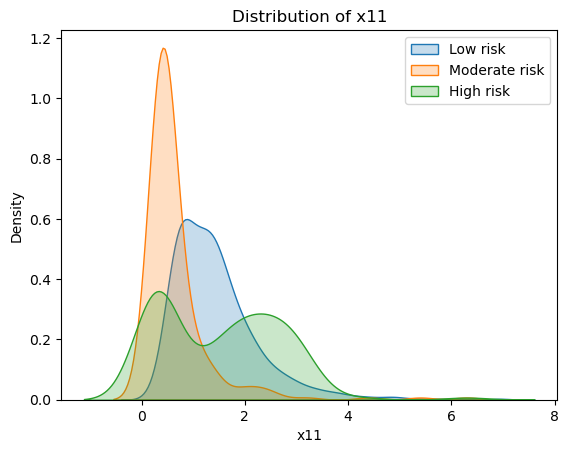

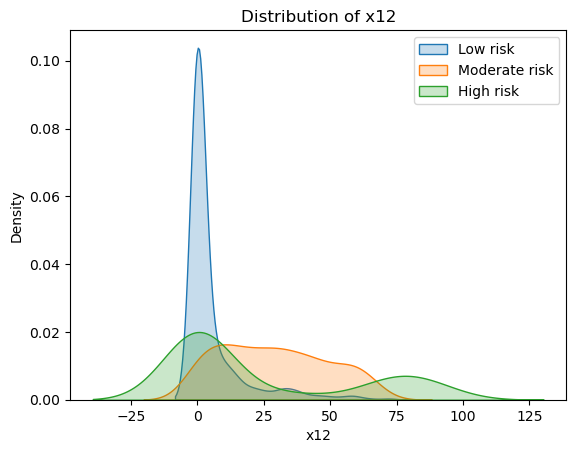

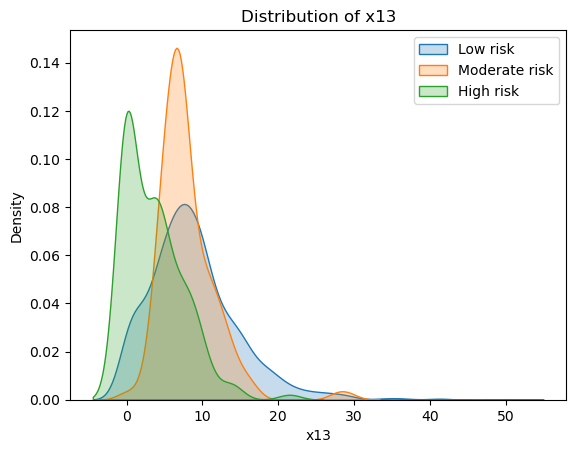

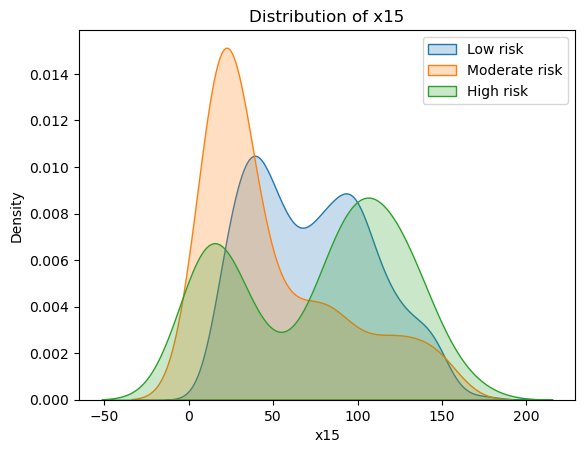

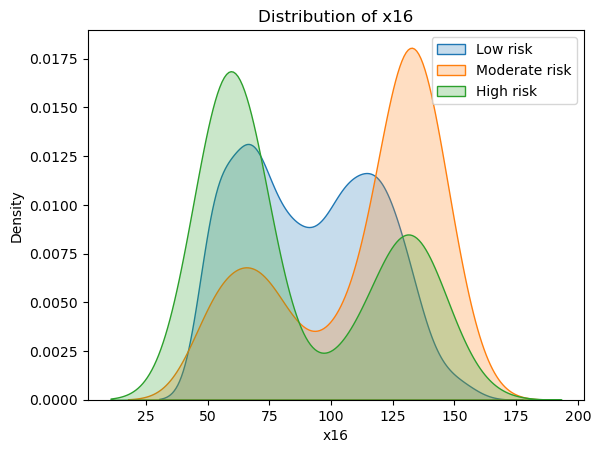

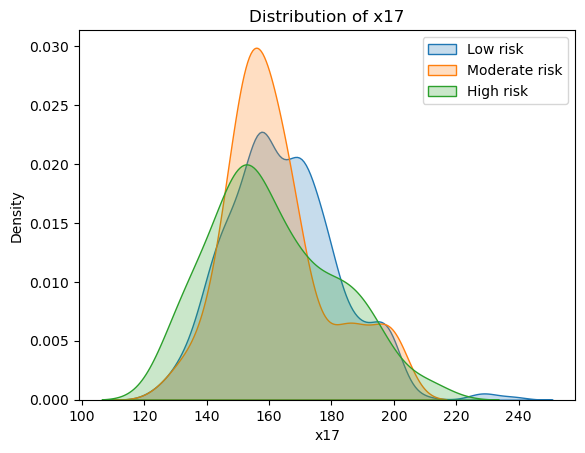

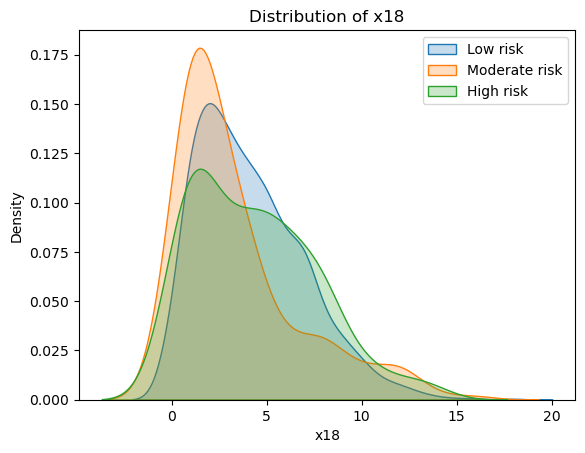

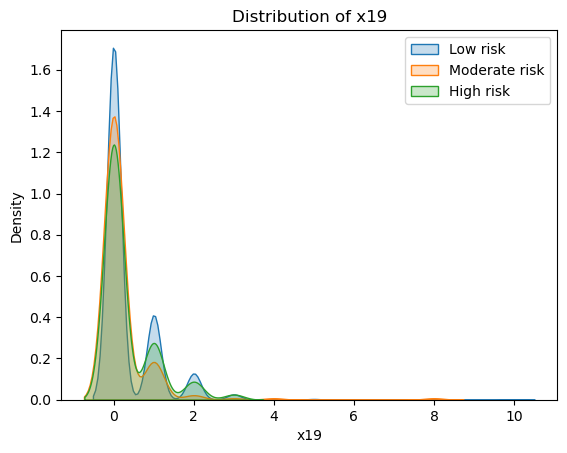

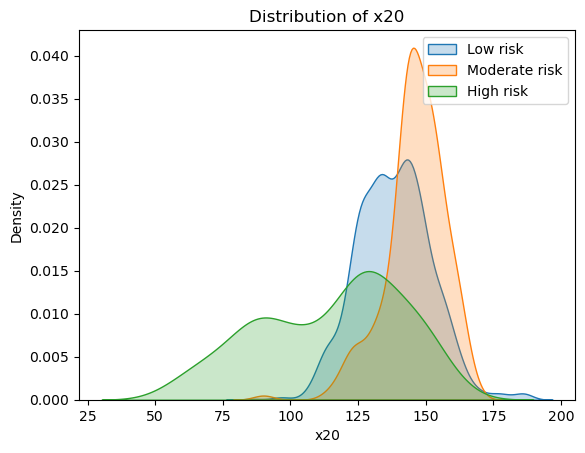

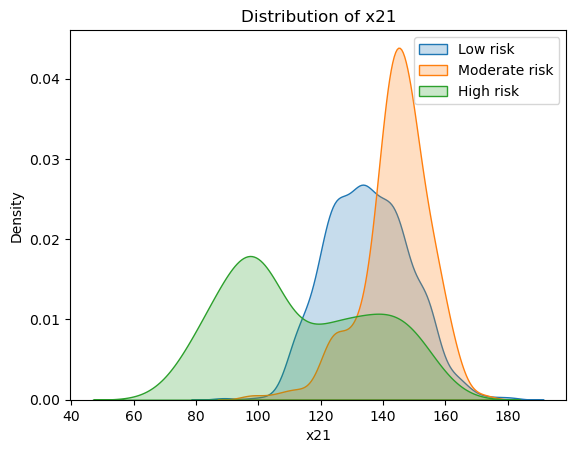

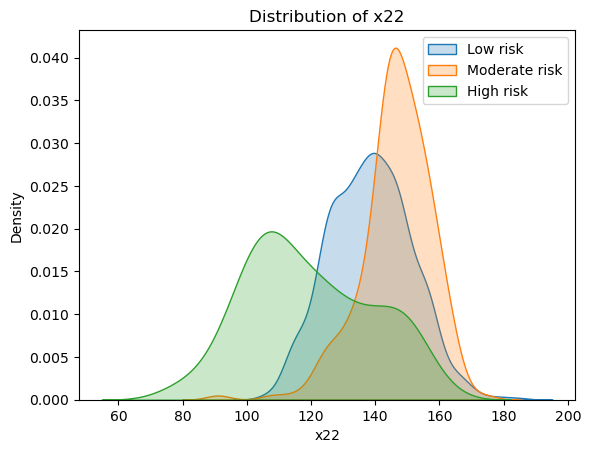

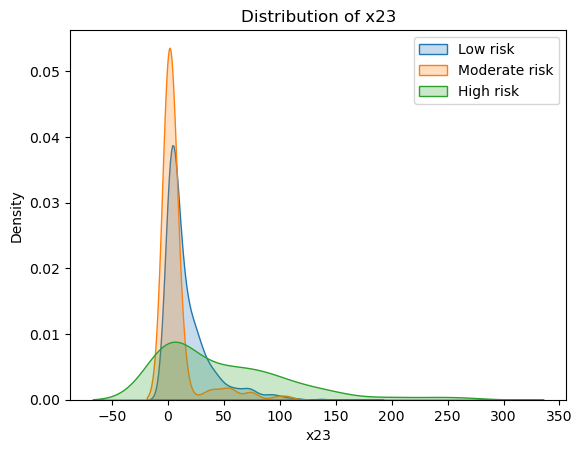

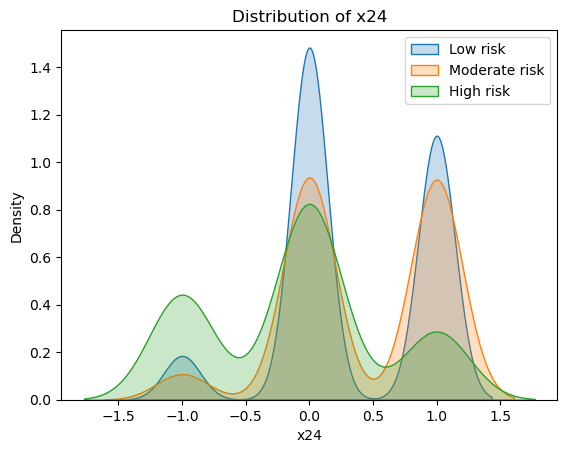

In [12]:
for column in numerical:
    plt.figure()
    sns.kdeplot(data=Health_train_data_Low[column],label="Low risk", shade=True)
    sns.kdeplot(data=Health_train_data_Moderate[column], label="Moderate risk",shade=True)
    sns.kdeplot(data=Health_train_data_High[column], label="High risk",shade=True)
    plt.legend()
    plt.title("Distribution of " +column)
    plt.savefig(column)

# Part 2: Data Pre-processing

In [13]:
# Getting the total no. of missing data points per column
missing_values_count = Health_train_data.isnull().sum()

# % of missing data points
total_cells = np.product(Health_train_data.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing/total_cells)*100

# Results

print("Missing Data per Column: \n", missing_values_count)
print("Total Missing Data:", total_missing)
print("Percentage of Missing Data:", percent_missing,"%")

Missing Data per Column: 
 id         0
x1         0
x2         0
x3         0
x4         0
x5        44
x6         0
x7         0
x8        17
x9         0
x10       27
x11        0
x12        0
x13        0
x14        0
x15        0
x16        0
x17        0
x18        0
x19        0
x20        0
x21        0
x22        0
x23        0
x24        0
target     0
dtype: int64
Total Missing Data: 88
Percentage of Missing Data: 0.2136752136752137 %


In [14]:
missing_columns = ['x5', 'x8','x10']
missingData = Health_train_data[missing_columns]
missingDataDes = missingData.describe()

for column in missing_columns:
    missingDataDes.loc['missing',column] = Health_train_data[column].isnull().sum()
    missingDataDes.loc['% missing',column] = Health_train_data[column].isnull().mean() * 100
    missingDataDes.loc['median',column] = Health_train_data[column].median()

missingDataDes


x5           x8          x10
count      1540.000000  1567.000000  1557.000000
mean          0.009906     0.000003    47.094412
std           0.048627     0.000050    17.269621
min           0.000000     0.000000    13.000000
25%           0.000000     0.000000    32.000000
50%           0.000000     0.000000    49.000000
75%           0.003000     0.000000    61.000000
max           0.477000     0.001000    86.000000
missing      44.000000    17.000000    27.000000
% missing     2.777778     1.073232     1.704545
median        0.000000     0.000000    49.000000

### Handling Missing Values from x5

In [15]:
#Creating df from column 'x10'
Before_imputationx5 = pd.DataFrame(Health_train_data['x5'])
print("Data before imputation:\n", Before_imputationx5)

Health_train_data['x5'] = Health_train_data['x5'].fillna(0.0)

#Dataset After Imputation
print("\n\nAfter performing imputation\n",Health_train_data['x5'])

Data before imputation:
          x5
0     0.000
1     0.000
2     0.000
3     0.000
4     0.003
...     ...
1579  0.001
1580  0.003
1581  0.000
1582  0.002
1583  0.000

[1584 rows x 1 columns]


After performing imputation
 0       0.000
1       0.000
2       0.000
3       0.000
4       0.003
        ...  
1579    0.001
1580    0.003
1581    0.000
1582    0.002
1583    0.000
Name: x5, Length: 1584, dtype: float64


### Handling Missing Values from x8

In [16]:
Health_train_data['x8'] = Health_train_data['x8'].fillna(0.0)
print(Health_train_data['x8'].describe())

count    1584.000000
mean        0.000003
std         0.000050
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.001000
Name: x8, dtype: float64


### Handling Missing Values from x10

In [17]:
#Creating df from column 'x10'
Before_imputationx10 = pd.DataFrame(Health_train_data['x10'])
print("Data before imputation:\n", Before_imputationx10)

#KNNImputer Object
imputer = KNNImputer(n_neighbors=2)
Health_train_data['x10'] = imputer.fit_transform(Before_imputationx10)

#Dataset After Imputation
print("\n\nAfter performing imputation\n",Health_train_data['x10'])


Data before imputation:
        x10
0     46.0
1     13.0
2     57.0
3     29.0
4     62.0
...    ...
1579  72.0
1580  60.0
1581  45.0
1582  48.0
1583  64.0

[1584 rows x 1 columns]


After performing imputation
 0       46.0
1       13.0
2       57.0
3       29.0
4       62.0
        ... 
1579    72.0
1580    60.0
1581    45.0
1582    48.0
1583    64.0
Name: x10, Length: 1584, dtype: float64


### Checking Missing Values after Handling

In [18]:
# Getting the total no. of missing data points per column
missing_values_count = Health_train_data.isnull().sum()

# % of missing data points
total_cells = np.product(Health_train_data.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing/total_cells)*100

# Results

print("Missing Data per Columnn after Handling: \n", missing_values_count)
print("Total Missing Data:", total_missing)
print("Percentage of Missing Data:", percent_missing,"%")

Missing Data per Columnn after Handling: 
 id        0
x1        0
x2        0
x3        0
x4        0
x5        0
x6        0
x7        0
x8        0
x9        0
x10       0
x11       0
x12       0
x13       0
x14       0
x15       0
x16       0
x17       0
x18       0
x19       0
x20       0
x21       0
x22       0
x23       0
x24       0
target    0
dtype: int64
Total Missing Data: 0
Percentage of Missing Data: 0.0 %


## Outlier Detection

In [19]:
print(Health_train_data[numerical].describe())
Health_train_data[numerical].shape

                x1           x2           x4           x5           x6  \
count  1584.000000  1584.000000  1584.000000  1584.000000  1584.000000   
mean   1053.188131   133.297980     0.003169     0.009631     0.004347   
std     615.996716    10.002632     0.003821     0.047974     0.002948   
min       0.000000   106.000000     0.000000     0.000000     0.000000   
25%     523.750000   126.000000     0.000000     0.000000     0.002000   
50%    1049.500000   133.000000     0.002000     0.000000     0.004000   
75%    1583.250000   141.000000     0.006000     0.002000     0.007000   
max    2125.000000   160.000000     0.019000     0.477000     0.014000   

                x7           x8           x9          x10          x11  ...  \
count  1584.000000  1584.000000  1584.000000  1584.000000  1584.000000  ...   
mean      0.001854     0.000003     0.000157    47.094412     1.337816  ...   
std       0.002940     0.000050     0.000593    17.121710     0.899092  ...   
min       0.00000

(1584, 22)

## Identifying Columns with Outliers

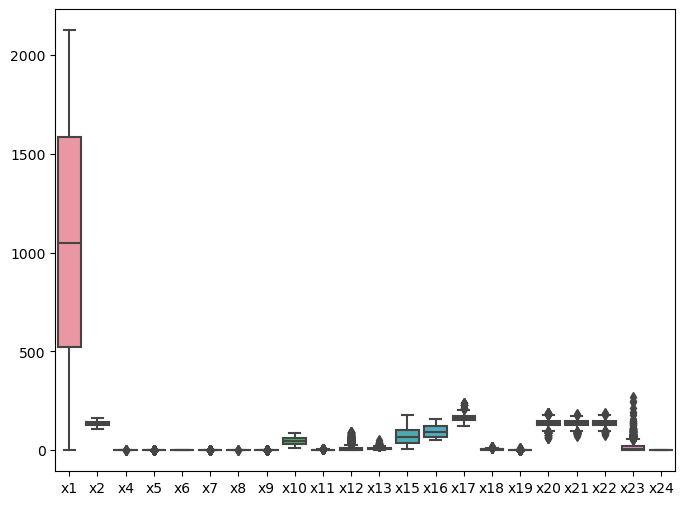

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=Health_train_data)
plt.show()

### Visualisation of Outlier Columns

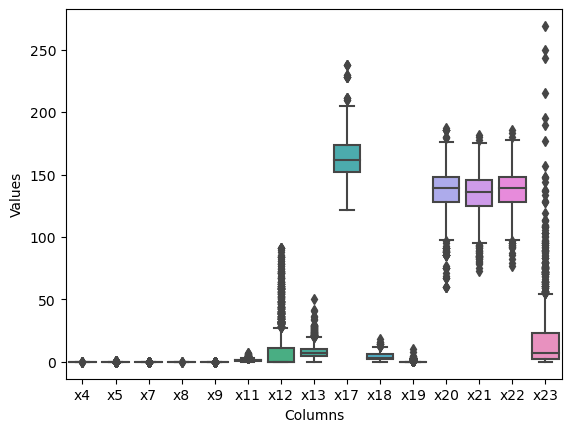

In [21]:
outlierCols = ['x4','x5','x7','x8','x9','x11','x12','x13','x17','x18','x19','x20','x21','x22','x23']

data = data=sumNum.loc[:,outlierCols]
bp_data = pd.DataFrame(data)
bp = sns.boxplot(data=data)
bp.set_xlabel('Columns')
bp.set_ylabel('Values')

plt.show()

### Determining Outliers in individual fields

In [22]:
# Create an empty dictionary to store the number of outliers for each column
outlier_counts = {}

# Iterate over each column
for column in Health_train_data[numerical].columns:
    # Get the data for the current column
    data = Health_train_data[column]
    
    # Create the box plot
    plt.boxplot(data)
    
    # Access the outliers
    outliers = plt.boxplot(data)["fliers"][0].get_ydata()
    
    # Count the number of outliers
    num_outliers = len(outliers)
    
    # Store the number of outliers in the dictionary
    outlier_counts[column] = num_outliers
    
    # Clear the current plot to prepare for the next column
    plt.clf()

# Print the number of outliers for each column
for column, num_outliers in outlier_counts.items():
    print("Column:", column)
    print("Number of outliers:", num_outliers)
    print()

# Calculate the total number of data points in the whole dataset for every numerical columns
total_data_points = Health_train_data.shape[0] * 22

# Calculate the total number of outliers
total_outliers = sum(outlier_counts.values())

# Calculate the proportion of outliers
proportion_outliers = total_outliers / total_data_points * 100

# Print the proportion of outliers
print("Total outliers:", total_outliers)
print("Percentage of outliers:", proportion_outliers, "%")

# Show the plot
plt.show()


Column: x1
Number of outliers: 0

Column: x2
Number of outliers: 0

Column: x4
Number of outliers: 8

Column: x5
Number of outliers: 266

Column: x6
Number of outliers: 0

Column: x7
Number of outliers: 102

Column: x8
Number of outliers: 4

Column: x9
Number of outliers: 131

Column: x10
Number of outliers: 0

Column: x11
Number of outliers: 53

Column: x12
Number of outliers: 238

Column: x13
Number of outliers: 58

Column: x15
Number of outliers: 0

Column: x16
Number of outliers: 0

Column: x17
Number of outliers: 15

Column: x18
Number of outliers: 16

Column: x19
Number of outliers: 371

Column: x20
Number of outliers: 52

Column: x21
Number of outliers: 33

Column: x22
Number of outliers: 19

Column: x23
Number of outliers: 150

Column: x24
Number of outliers: 0

Total outliers: 1516
Percentage of outliers: 4.350321395775941 %


<Figure size 640x480 with 0 Axes>

### Outlier Detection Methods & Masking

#### DBSCAN

In [23]:
# Setting the numerical columns in the whole dataset and target variable
Health_data_num = Health_train_data[numerical]
Health_data_target = Health_train_data.target
print(Health_data_num.shape)
print(Health_data_target.shape)

(1584, 22)
(1584,)


##### eps parameter determination

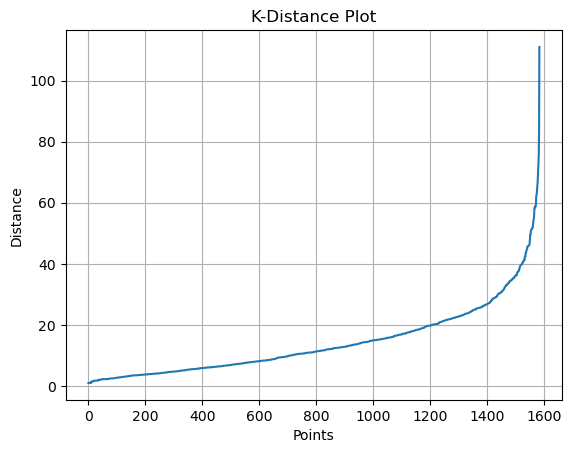

In [24]:
# Calculate the average distance between each point in the data set and its 22 nearest neighbors (my selected min_samples value).
neighbors = NearestNeighbors(n_neighbors=15)
neighbors_fit = neighbors.fit(Health_data_num)
distances, indices = neighbors_fit.kneighbors(Health_data_num)

# Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("K-Distance Plot")
plt.plot(distances)
plt.grid(True)
plt.savefig('K-distancePlot.jpg')

In [25]:
outlier_detection = DBSCAN(min_samples = 15, eps =55)
clusters = outlier_detection.fit_predict(Health_data_num)

#Count total number of outliers as count of those labelled as -1
TotalOutliers=list(clusters).count(-1)
#print (clusters)
print("Total number of outliers identified is: ",TotalOutliers)



Total number of outliers identified is:  236


#### Masking

In [26]:
# Select all rows that are not outliers and create a boolean mask
mask = clusters != -1
# Apply mask to y and check shape
Health_data_target_y1 = Health_data_target[mask]
print (Health_data_target_y1.shape)

#Apply mask to X and check shape 
Health_train_data_cols = Health_train_data[columns]
Health_data_X1 =Health_train_data_cols[mask]
Health_data_X1.shape

(1348,)


(1348, 24)

##### Checking Distribution of columns after pre-processing to see if its still representative

In [27]:
Health_data_X1['x8'].describe()

count    1348.000000
mean        0.000001
std         0.000039
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.001000
Name: x8, dtype: float64

In [28]:
Health_data_num_Low = Health_data_X1.loc[(Health_train_data.target.str.strip()=='Low risk')]
Health_data_num_Moderate = Health_data_X1.loc[(Health_train_data.target.str.strip()=='Moderate risk')]
Health_data_num_High = Health_data_X1.loc[(Health_train_data.target.str.strip()=='High risk')]

/Users/miguelrosales/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/miguelrosales/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/var/folders/g5/dd0xvvm965l_rfbkt9j5blvh0000gn/T/ipykernel_39997/3001730640.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


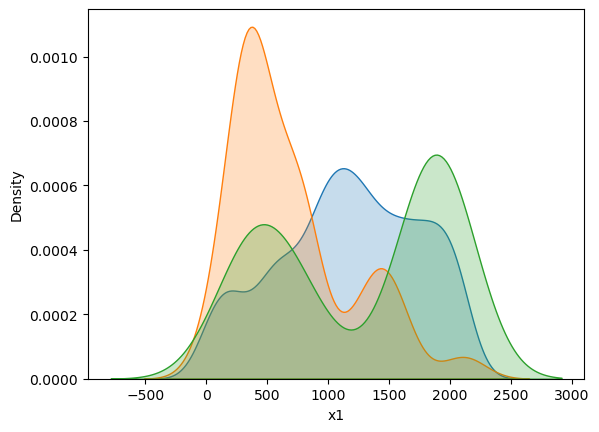

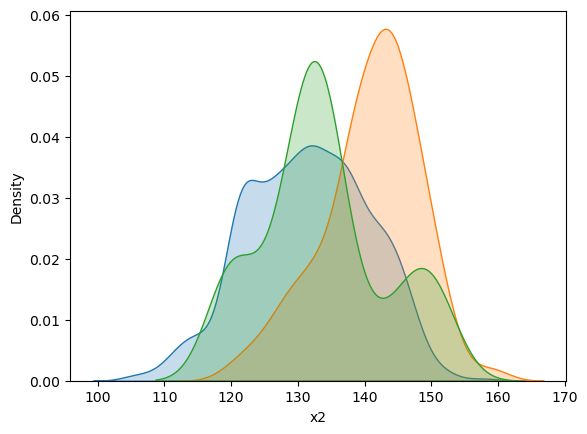

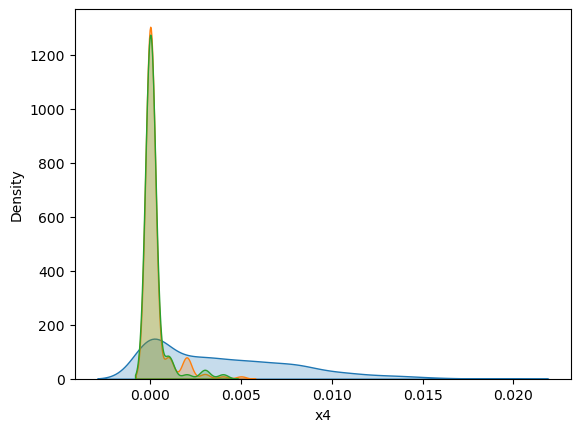

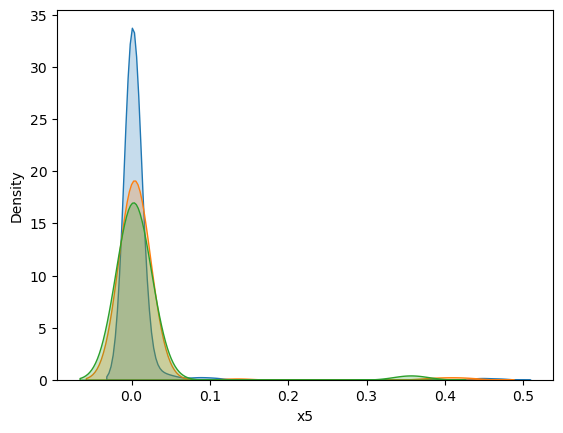

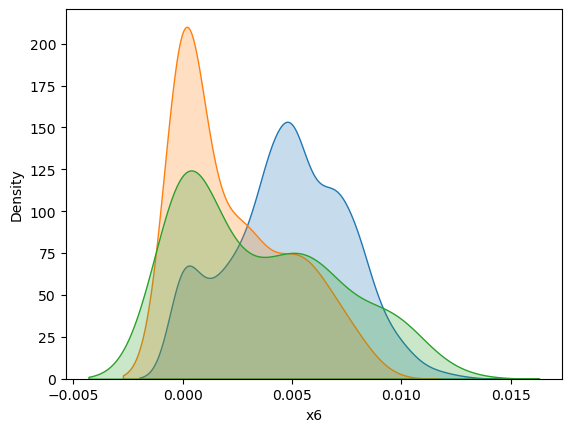

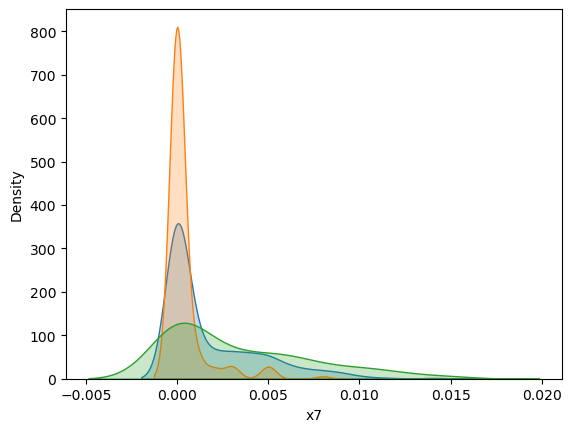

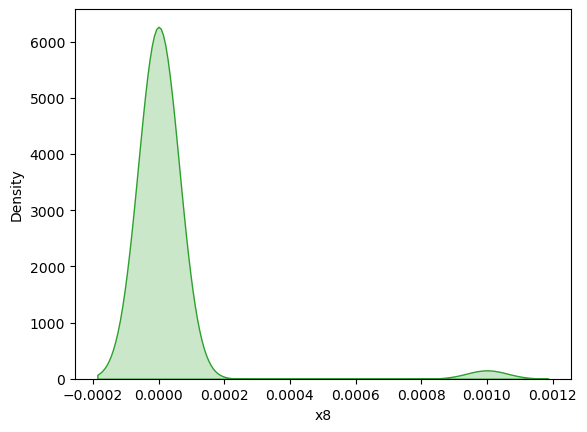

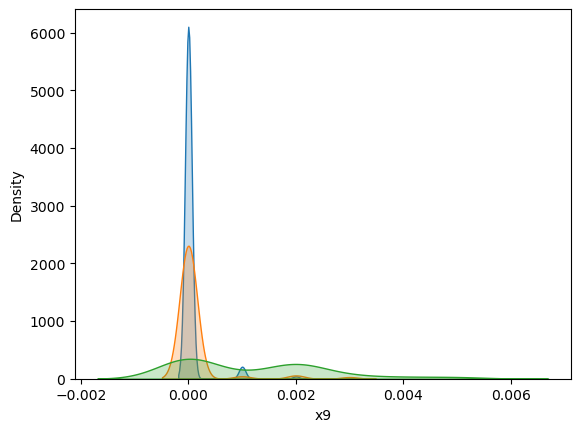

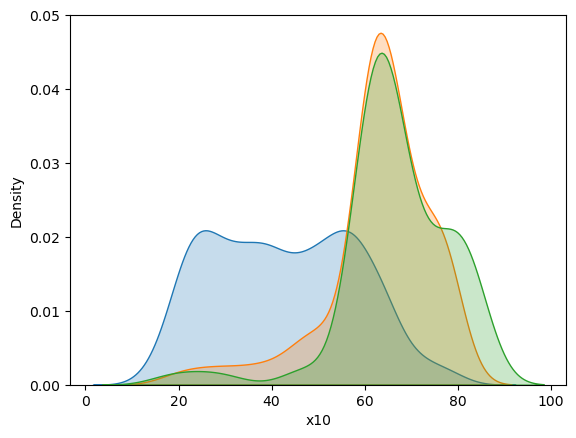

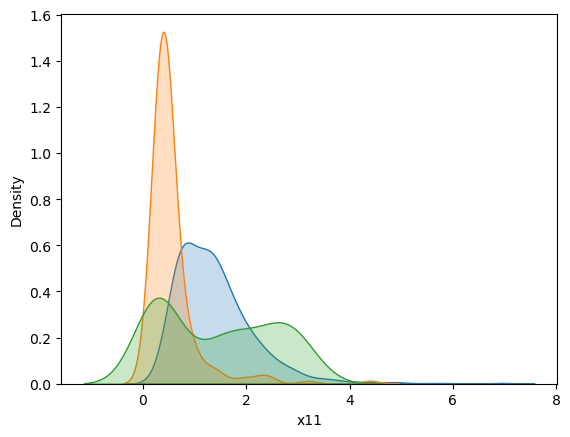

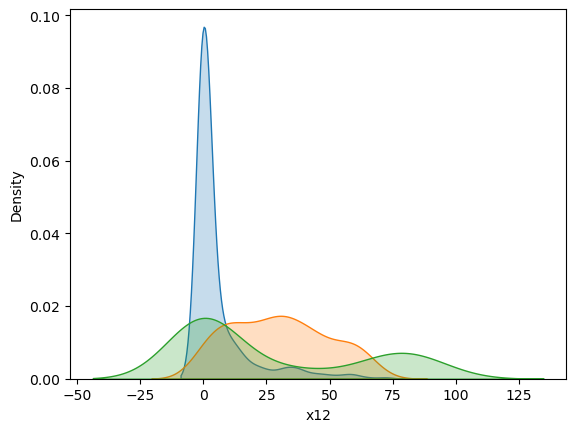

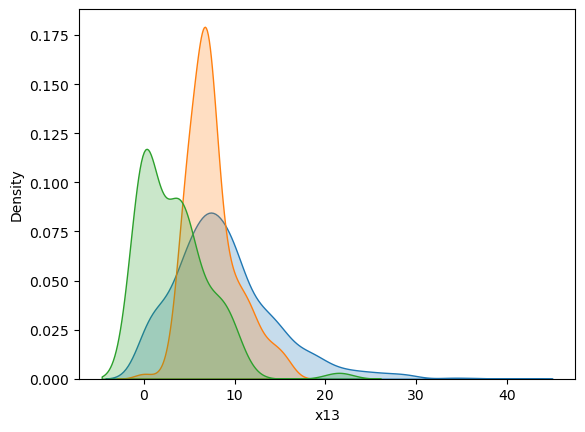

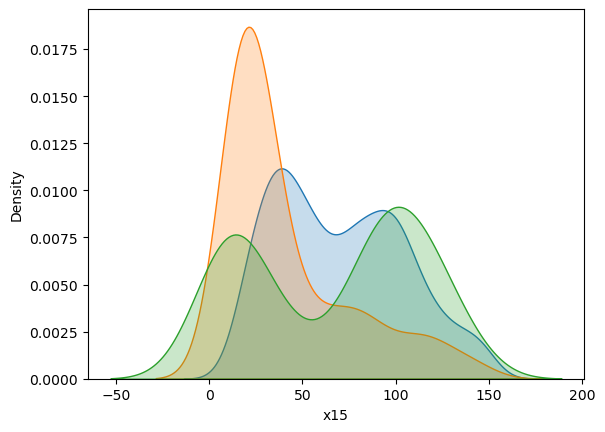

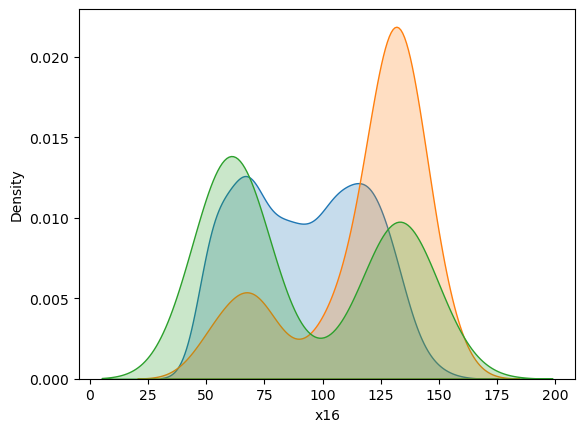

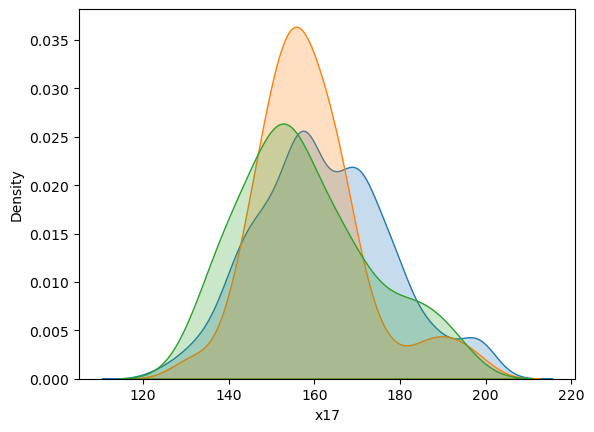

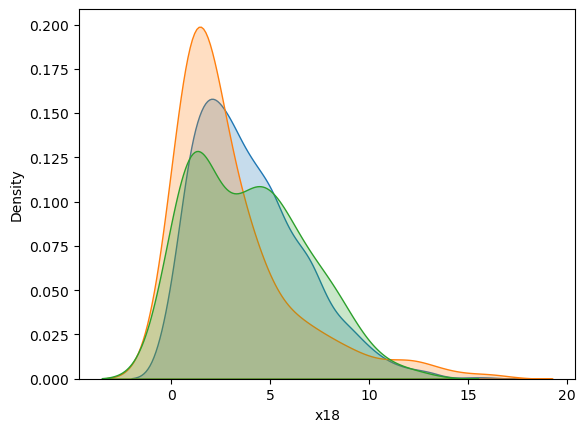

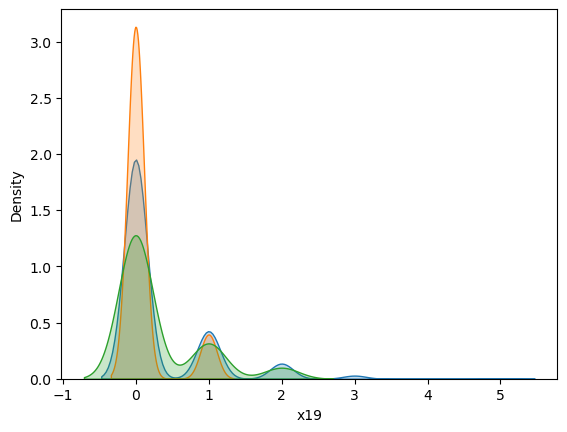

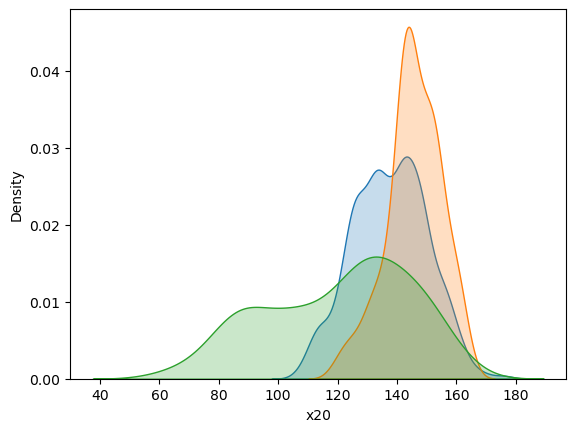

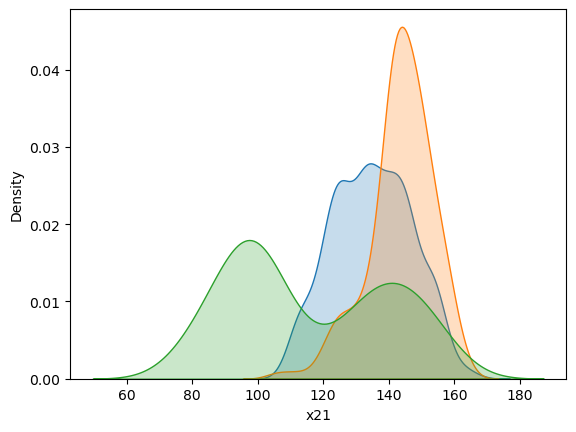

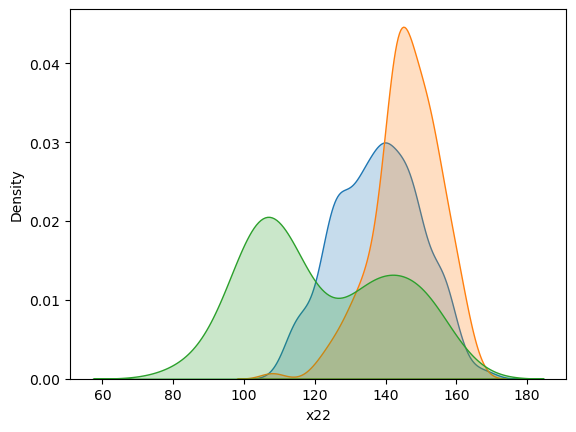

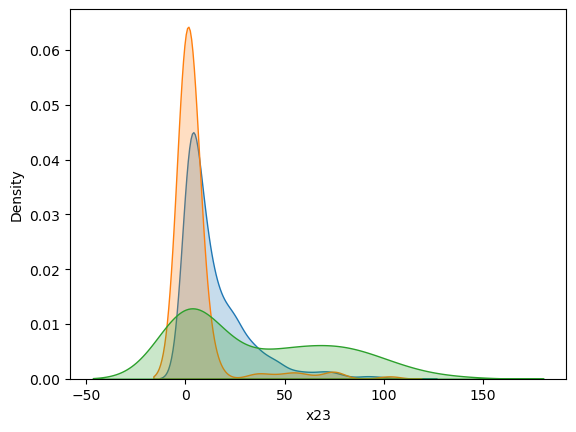

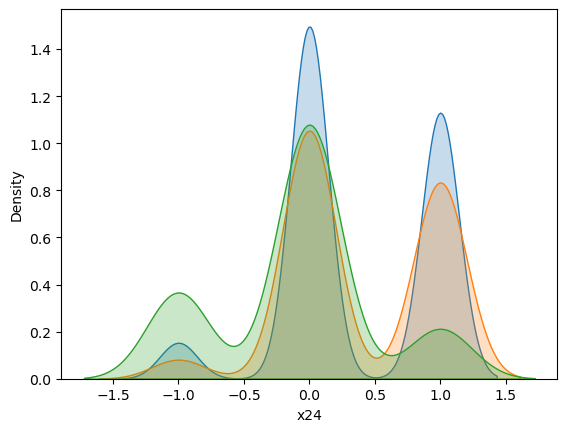

In [29]:
for column in Health_data_X1[numerical]:
    plt.figure()
    sns.kdeplot(data=Health_data_num_Low[column],label="Low risk", shade=True)
    sns.kdeplot(data=Health_data_num_Moderate[column], label="Moderate risk",shade=True)
    sns.kdeplot(data=Health_data_num_High[column], label="High risk",shade=True)

### Correlation Analysis

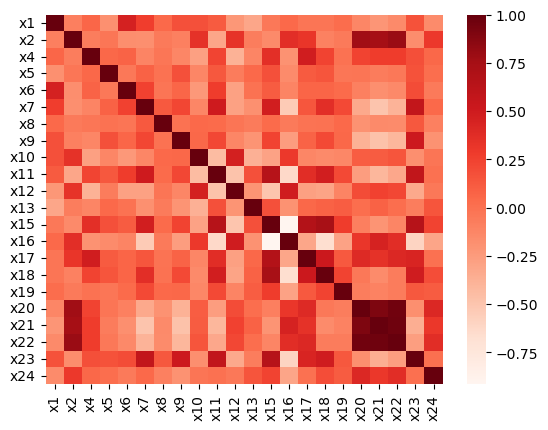

<Figure size 1200x1000 with 0 Axes>

In [30]:
X1 = Health_data_X1
corr = X1.corr()

heat = sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.figure(figsize=(12,10))
plt.show()
heat.figure.savefig('CorrelationHeatmap.jpg')

#### Determining VIF and selecting columns

In [31]:
def find_vifs(dataset):
    
    # need a base dataset
    base_vif = pd.DataFrame()
    
    # this will be our rows
    base_vif['Columns'] = dataset.columns
    
    # calculate each of those values
    base_vif['VIF'] = [variance_inflation_factor(dataset.values, i) for i \
                      in range(dataset.shape[1])]
    
    # return it
    return base_vif

# lets send everything but our target variable to our function
VIF = find_vifs(X1[numerical][[col for col in X1[numerical].columns if col != 'quality']])
VIF_df = pd.DataFrame(VIF)
print(VIF_df)

   Columns          VIF
0       x1     9.030821
1       x2  1291.530484
2       x4     5.187949
3       x5     1.174143
4       x6     5.051290
5       x7     4.733212
6       x8     1.214167
7       x9     3.498383
8      x10    18.726375
9      x11    10.152249
10     x12     2.805189
11     x13     6.749582
12     x15          inf
13     x16          inf
14     x17          inf
15     x18     6.822206
16     x19     1.422441
17     x20  1491.162342
18     x21  3188.404377
19     x22  5124.809691
20     x23     5.577854
21     x24     3.721522


/Users/miguelrosales/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [32]:
high_corr_col = ['x2', 'x20', 'x21', 'x22']

# Part 3: Supervised Model Training, Evaluation, and submitting the predicted labels

## Data Exploration

In [33]:
#Shape of health train data
print(X1.shape)

#Data information 
print(X1.info())
print(X1.describe())

health_data = X1.copy()
full_health = pd.concat([X1, Health_data_target_y1], axis=1)

(1348, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 1582
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1348 non-null   int64  
 1   x2      1348 non-null   float64
 2   x3      1348 non-null   object 
 3   x4      1348 non-null   float64
 4   x5      1348 non-null   float64
 5   x6      1348 non-null   float64
 6   x7      1348 non-null   float64
 7   x8      1348 non-null   float64
 8   x9      1348 non-null   float64
 9   x10     1348 non-null   float64
 10  x11     1348 non-null   float64
 11  x12     1348 non-null   float64
 12  x13     1348 non-null   float64
 13  x14     1348 non-null   object 
 14  x15     1348 non-null   float64
 15  x16     1348 non-null   float64
 16  x17     1348 non-null   float64
 17  x18     1348 non-null   float64
 18  x19     1348 non-null   float64
 19  x20     1348 non-null   float64
 20  x21     1348 non-null   float64
 21  x22     1348 non-null   fl

## Encoding

In [34]:
health_data.select_dtypes(include=['object']).columns

# Resetting the index of the health_balanced dataset to apply this to encoding
health_reset = full_health.reset_index()
health_new = health_reset.drop('index', axis=1)
health_new

x1     x2 x3     x4     x5     x6     x7   x8     x9   x10  ...  \
0     1406  145.0  F  0.005  0.000  0.002  0.000  0.0  0.000  46.0  ...   
1      479  145.0  F  0.000  0.000  0.000  0.002  0.0  0.000  57.0  ...   
2      906  146.0  F  0.004  0.000  0.005  0.003  0.0  0.000  29.0  ...   
3       70  144.0  F  0.001  0.000  0.005  0.000  0.0  0.000  45.0  ...   
4     1702  137.0  F  0.006  0.002  0.005  0.002  0.0  0.000  57.0  ...   
...    ...    ... ..    ...    ...    ...    ...  ...    ...   ...  ...   
1343  1731  134.0  F  0.008  0.001  0.010  0.006  0.0  0.000  61.0  ...   
1344  2077  130.0  M  0.005  0.001  0.001  0.000  0.0  0.000  72.0  ...   
1345   664  138.0  F  0.000  0.003  0.003  0.000  0.0  0.002  60.0  ...   
1346  1431  144.0  F  0.000  0.000  0.006  0.000  0.0  0.000  45.0  ...   
1347   630  134.0  F  0.017  0.002  0.004  0.000  0.0  0.000  48.0  ...   

        x16    x17   x18  x19    x20    x21    x22   x23  x24         target  
0     104.0  171.0   4.0  0.0  155.0  153.0  154.0   4.0  1.0       Low risk  
1     111.0  157.0   1.0  1.0  150.0  146.0  149.0   6.0  1.0       Low risk  
2     107.0  169.0   2.0  2.0  150.0  147.0  149.0   7.0  0.0       Low risk  
3     138.0  168.0   3.0  0.0  162.0  157.0  160.0   5.0  1.0       Low risk  
4      69.0  178.0   3.0  1.0  148.0  143.0  149.0  43.0  1.0       Low risk  
...     ...    ...   ...  ...    ...    ...    ...   ...  ...            ...  
1343   80.0  189.0  10.0  0.0  156.0  144.0  151.0  61.0  0.0       Low risk  
1344  127.0  158.0   2.0  0.0  139.0  139.0  140.0   3.0  0.0       Low risk  
1345   69.0  187.0  10.0  1.0  142.0  130.0  140.0  61.0  0.0  Moderate risk  
1346  139.0  169.0   2.0  0.0  157.0  155.0  157.0   2.0  0.0  Moderate risk  
1347   50.0  170.0   5.0  0.0  160.0  150.0  155.0  28.0  1.0       Low risk  

[1348 rows x 25 columns]

### One-Hot Encoding - x3

Since there is no orindal relationship in x3, it would be useful to apply one-hot encoding. Since there is only 2 unique values for this categorical column, it would be useful to apply this encoding technique to quickly identify if values are either `M` or `F`, as both values are equally as important.

In [35]:
enc = OneHotEncoder(handle_unknown='ignore')

# Passing `enc` to the `x3` columns
enc_df = pd.DataFrame(enc.fit_transform(health_new[['x3']]).toarray())
enc_df.columns = enc.get_feature_names(['S'])
print(enc_df)

#Adding the newly formed encoded x3 column to the original data
health_new = pd.concat([health_new, enc_df], axis=1)
ohx3_df = health_new.head().copy()

      S_F  S_M
0     1.0  0.0
1     1.0  0.0
2     1.0  0.0
3     1.0  0.0
4     1.0  0.0
...   ...  ...
1343  1.0  0.0
1344  0.0  1.0
1345  1.0  0.0
1346  1.0  0.0
1347  1.0  0.0

[1348 rows x 2 columns]


/Users/miguelrosales/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Target Encoding - x14

Since there are multiple unique values in the x14 categorical column, the occurences of these values may be dependent on the target variable. For example, we have determined from Part 1 that the distribution of x14 varies for each target value. This provides an importance by numerically categorising x14. This can help capture the target-dependent information. 
Therefore, it would be usefull to encode this categorical column based on the target variable. 

In [36]:
# Encode the target variable (don't include in the new dataset containing the encoded columns)
enc = ce.OrdinalEncoder(cols=['target'],handle_missing='return_nan',return_df= True)
X=enc.fit_transform(health_new)

# Initialize the TargetEncoder
encoder = ce.TargetEncoder(cols=['x14'])

# Fit and transform the data
tar_encoded_data = pd.DataFrame(encoder.fit_transform(X['x14'], X['target']))
tar_encoded = tar_encoded_data.rename(columns={'x14': 'B_tar'})

# Merge the encoded column back to the original DataFrame
health_new = pd.concat([tar_encoded, health_new], axis=1)

In [37]:
#Displaying Encoded Health DF
health_new

B_tar    x1     x2 x3     x4     x5     x6     x7   x8     x9  ...  \
0     1.052910  1406  145.0  F  0.005  0.000  0.002  0.000  0.0  0.000  ...   
1     1.052910   479  145.0  F  0.000  0.000  0.000  0.002  0.0  0.000  ...   
2     1.052910   906  146.0  F  0.004  0.000  0.005  0.003  0.0  0.000  ...   
3     1.681477    70  144.0  F  0.001  0.000  0.005  0.000  0.0  0.000  ...   
4     1.197628  1702  137.0  F  0.006  0.002  0.005  0.002  0.0  0.000  ...   
...        ...   ...    ... ..    ...    ...    ...    ...  ...    ...  ...   
1343  1.052910  1731  134.0  F  0.008  0.001  0.010  0.006  0.0  0.000  ...   
1344  1.371621  2077  130.0  M  0.005  0.001  0.001  0.000  0.0  0.000  ...   
1345  1.197628   664  138.0  F  0.000  0.003  0.003  0.000  0.0  0.002  ...   
1346  1.681477  1431  144.0  F  0.000  0.000  0.006  0.000  0.0  0.000  ...   
1347  1.327731   630  134.0  F  0.017  0.002  0.004  0.000  0.0  0.000  ...   

       x18  x19    x20    x21    x22   x23  x24         target  S_F  S_M  
0      4.0  0.0  155.0  153.0  154.0   4.0  1.0       Low risk  1.0  0.0  
1      1.0  1.0  150.0  146.0  149.0   6.0  1.0       Low risk  1.0  0.0  
2      2.0  2.0  150.0  147.0  149.0   7.0  0.0       Low risk  1.0  0.0  
3      3.0  0.0  162.0  157.0  160.0   5.0  1.0       Low risk  1.0  0.0  
4      3.0  1.0  148.0  143.0  149.0  43.0  1.0       Low risk  1.0  0.0  
...    ...  ...    ...    ...    ...   ...  ...            ...  ...  ...  
1343  10.0  0.0  156.0  144.0  151.0  61.0  0.0       Low risk  1.0  0.0  
1344   2.0  0.0  139.0  139.0  140.0   3.0  0.0       Low risk  0.0  1.0  
1345  10.0  1.0  142.0  130.0  140.0  61.0  0.0  Moderate risk  1.0  0.0  
1346   2.0  0.0  157.0  155.0  157.0   2.0  0.0  Moderate risk  1.0  0.0  
1347   5.0  0.0  160.0  150.0  155.0  28.0  1.0       Low risk  1.0  0.0  

[1348 rows x 28 columns]

### Dropping the Categorical Columns

In [38]:
dropped_columns = ['x3', 'x14']
health_new = health_new.drop(dropped_columns, axis=1)

In [39]:
health_new

B_tar    x1     x2     x4     x5     x6     x7   x8     x9   x10  \
0     1.052910  1406  145.0  0.005  0.000  0.002  0.000  0.0  0.000  46.0   
1     1.052910   479  145.0  0.000  0.000  0.000  0.002  0.0  0.000  57.0   
2     1.052910   906  146.0  0.004  0.000  0.005  0.003  0.0  0.000  29.0   
3     1.681477    70  144.0  0.001  0.000  0.005  0.000  0.0  0.000  45.0   
4     1.197628  1702  137.0  0.006  0.002  0.005  0.002  0.0  0.000  57.0   
...        ...   ...    ...    ...    ...    ...    ...  ...    ...   ...   
1343  1.052910  1731  134.0  0.008  0.001  0.010  0.006  0.0  0.000  61.0   
1344  1.371621  2077  130.0  0.005  0.001  0.001  0.000  0.0  0.000  72.0   
1345  1.197628   664  138.0  0.000  0.003  0.003  0.000  0.0  0.002  60.0   
1346  1.681477  1431  144.0  0.000  0.000  0.006  0.000  0.0  0.000  45.0   
1347  1.327731   630  134.0  0.017  0.002  0.004  0.000  0.0  0.000  48.0   

      ...   x18  x19    x20    x21    x22   x23  x24         target  S_F  S_M  
0     ...   4.0  0.0  155.0  153.0  154.0   4.0  1.0       Low risk  1.0  0.0  
1     ...   1.0  1.0  150.0  146.0  149.0   6.0  1.0       Low risk  1.0  0.0  
2     ...   2.0  2.0  150.0  147.0  149.0   7.0  0.0       Low risk  1.0  0.0  
3     ...   3.0  0.0  162.0  157.0  160.0   5.0  1.0       Low risk  1.0  0.0  
4     ...   3.0  1.0  148.0  143.0  149.0  43.0  1.0       Low risk  1.0  0.0  
...   ...   ...  ...    ...    ...    ...   ...  ...            ...  ...  ...  
1343  ...  10.0  0.0  156.0  144.0  151.0  61.0  0.0       Low risk  1.0  0.0  
1344  ...   2.0  0.0  139.0  139.0  140.0   3.0  0.0       Low risk  0.0  1.0  
1345  ...  10.0  1.0  142.0  130.0  140.0  61.0  0.0  Moderate risk  1.0  0.0  
1346  ...   2.0  0.0  157.0  155.0  157.0   2.0  0.0  Moderate risk  1.0  0.0  
1347  ...   5.0  0.0  160.0  150.0  155.0  28.0  1.0       Low risk  1.0  0.0  

[1348 rows x 26 columns]

## Feature Selection

In [40]:
obj_df = health_new.select_dtypes(exclude=['object']).copy()
FS_Cols=obj_df.columns
FS_Cols

Index(['B_tar', 'x1', 'x2', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22',
       'x23', 'x24', 'S_F', 'S_M'],
      dtype='object')

In [41]:
FS_data =  health_new[FS_Cols]
FS_y = health_new.target

### Univariante FS - ANOVA

In [42]:
# configure to select all features
selector = SelectKBest(score_func=f_classif, k='all')

# transform train input data
Xfs = selector.fit_transform(FS_data,FS_y)

#### Displaying Scores

In [43]:
#Retrieve the column names for the selected columns
names = FS_data.columns.values[selector.get_support()]
#and their scores
scores = selector.scores_[selector.get_support()]
#pair the values together with the zip function
names_scores = list(zip(names, scores))
#Store the information in a data frame
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'ANOVA F measure'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['ANOVA F measure', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

   Feat_names  ANOVA F measure
8          x9       276.920688
11        x12       230.598819
9         x10       220.034944
19        x21       133.644203
0       B_tar       125.522885
3          x4       112.091149
20        x22       109.209868
18        x20       107.093846
10        x11        85.341607
2          x2        82.591603
21        x23        69.774965
5          x6        67.325519
14        x16        67.068834
1          x1        54.666381
23        S_F        53.050108
24        S_M        53.050108
13        x15        49.922369
12        x13        44.139048
6          x7        38.076568
22        x24        24.315607
7          x8        14.990374
17        x19         8.060271
16        x18         7.908148
15        x17         5.363505
4          x5         0.659557


### Univariante FS - Kendall's

In [44]:
correlations = {}
for feature in FS_data[FS_Cols]:
    correlation, _ = kendalltau(FS_data[feature], FS_y)
    correlations[feature] = correlation
    
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

kendall_df = pd.DataFrame(sorted_correlations, columns=['Feature', 'Kendall\'s Correlation'])
kendall_df_sorted = kendall_df.sort_values(['Kendall\'s Correlation', 'Feature'], ascending = [False, True])
kendall_df_sorted

/Users/miguelrosales/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


Feature  Kendall's Correlation
0      x12               0.300107
4      x21               0.255325
5      x22               0.251703
6      x20               0.238189
7      S_F               0.227538
9      x16               0.213797
11      x2               0.205211
16     x24               0.115546
17   B_tar               0.111052
18     x10               0.107019
20     x13               0.091976
23      x5               0.072967
24     x17              -0.017175
22     x19              -0.085596
21      x8              -0.089691
19     x18              -0.101022
15      x4              -0.121637
14      x6              -0.143487
13     x15              -0.186661
12      x1              -0.202411
10      x7              -0.205560
8      S_M              -0.227538
3      x23              -0.257121
2       x9              -0.266602
1      x11              -0.296878

### Validation of the best method

In [45]:
#If have time valide 

### Selecting Features from both methods

In [46]:
selected_cols = ['x4', 'x7', 'x9', 'x10', 'x11', 'x12', 'x21', 'x22', 'x23', 'target']
health_selected = health_new[selected_cols]
health_selected

x4     x7     x9   x10  x11  x12    x21    x22   x23         target
0     0.005  0.000  0.000  46.0  0.8  0.0  153.0  154.0   4.0       Low risk
1     0.000  0.002  0.000  57.0  0.5  0.0  146.0  149.0   6.0       Low risk
2     0.004  0.003  0.000  29.0  1.2  1.0  147.0  149.0   7.0       Low risk
3     0.001  0.000  0.000  45.0  0.8  2.0  157.0  160.0   5.0       Low risk
4     0.006  0.002  0.000  57.0  1.4  0.0  143.0  149.0  43.0       Low risk
...     ...    ...    ...   ...  ...  ...    ...    ...   ...            ...
1343  0.008  0.006  0.000  61.0  1.1  0.0  144.0  151.0  61.0       Low risk
1344  0.005  0.000  0.000  72.0  0.9  8.0  139.0  140.0   3.0       Low risk
1345  0.000  0.000  0.002  60.0  1.0  8.0  130.0  140.0  61.0  Moderate risk
1346  0.000  0.000  0.000  45.0  0.7  0.0  155.0  157.0   2.0  Moderate risk
1347  0.017  0.000  0.000  48.0  2.2  0.0  150.0  155.0  28.0       Low risk

[1348 rows x 10 columns]

## Sampling

### Reviewing Data

In [47]:
wo_target = ['x4', 'x7', 'x9', 'x10', 'x11', 'x12', 'x21', 'x22', 'x23']
X = health_selected[wo_target]
X.shape

(1348, 9)

In [48]:
pre_y = health_selected.target
pre_y.describe()

count         1348
unique           3
top       Low risk
freq          1092
Name: target, dtype: object

### Label Encoding Target

In [49]:
label_encoder = LabelEncoder()
pre_y = label_encoder.fit_transform(pre_y)
print("Original labels", label_encoder.classes_)
print("Labels after encoding", pre_y)

Original labels ['High risk' 'Low risk' 'Moderate risk']
Labels after encoding [1 1 1 ... 2 2 1]


In [50]:
y = pd.DataFrame({'target': pre_y})
y

target
0          1
1          1
2          1
3          1
4          1
...      ...
1343       1
1344       1
1345       2
1346       2
1347       1

[1348 rows x 1 columns]

In [51]:
part1_X,test_X, part1_y, test_y= train_test_split (X,y, test_size=0.2,random_state=1)

In [52]:
test_y

target
1126       2
625        1
315        1
554        1
101        1
...      ...
288        1
35         1
493        1
959        2
536        1

[270 rows x 1 columns]

In [53]:
part1_X.describe()

x4           x7           x9          x10          x11  \
count  1078.000000  1078.000000  1078.000000  1078.000000  1078.000000   
mean      0.003336     0.001669     0.000126    46.688471     1.292486   
std       0.003895     0.002699     0.000521    17.102661     0.835566   
min       0.000000     0.000000     0.000000    13.000000     0.200000   
25%       0.000000     0.000000     0.000000    32.000000     0.700000   
50%       0.002000     0.000000     0.000000    47.094412     1.200000   
75%       0.006000     0.003000     0.000000    61.000000     1.700000   
max       0.019000     0.015000     0.005000    84.000000     7.000000   

               x12          x21          x22          x23  
count  1078.000000  1078.000000  1078.000000  1078.000000  
mean      9.901670   135.045455   138.110390    14.927644  
std      18.315495    13.885684    13.138639    20.082938  
min       0.000000    79.000000    82.000000     0.000000  
25%       0.000000   126.000000   129.000000     2.000000  
50%       0.000000   136.000000   140.000000     7.000000  
75%      11.000000   145.000000   147.000000    20.000000  
max      91.000000   168.000000   170.000000   134.000000

In [54]:
train_X,val_X, train_y, val_y= train_test_split (part1_X,part1_y, test_size=0.2,random_state=1)

print("Train set description \n", train_X.describe())
print("Validation set description \n",val_X.describe())
print("Test set description \n",test_X.describe())

Train set description 
                x4          x7          x9         x10         x11         x12  \
count  862.000000  862.000000  862.000000  862.000000  862.000000  862.000000   
mean     0.003397    0.001653    0.000123   46.608810    1.303248    9.584687   
std      0.003947    0.002681    0.000538   17.159201    0.831376   17.871958   
min      0.000000    0.000000    0.000000   13.000000    0.200000    0.000000   
25%      0.000000    0.000000    0.000000   32.000000    0.700000    0.000000   
50%      0.002000    0.000000    0.000000   47.094412    1.200000    0.000000   
75%      0.006000    0.003000    0.000000   60.000000    1.700000   11.000000   
max      0.019000    0.015000    0.005000   84.000000    6.900000   91.000000   

              x21         x22         x23  
count  862.000000  862.000000  862.000000  
mean   135.095128  138.199536   14.955916  
std     13.820241   13.102281   20.271053  
min     79.000000   82.000000    0.000000  
25%    126.000000  129.000

## Balancing

### Distribution of target

In [55]:
target_counts = train_y.value_counts()
target_percentages = train_y.value_counts(normalize=True) * 100

print("Count of each target category:")
print(target_counts)
print("\nPercentage of each target category (%):")
print(target_percentages)
Target_count = pd.DataFrame(target_counts)
Target_count.to_csv('Target_count.csv', index=True)

Count of each target category:
target
1         701
2         109
0          52
dtype: int64

Percentage of each target category (%):
target
1         81.322506
2         12.645012
0          6.032483
dtype: float64


### Concatenate and seperate target classes

In [56]:
#The first thing is contatenate our training data back together.  
resampling = train_X.copy()
resampling['target']= train_y.values

# separate minority and majority classes
majority_class_low = resampling[resampling['target']==1]
majority_class_moderate = resampling[resampling['target']==2]
moderate_class = resampling[resampling['target']==2]
minority_class_moderate = resampling[resampling['target']==2]
minority_class_high = resampling[resampling['target']==0]

### Data before balancing

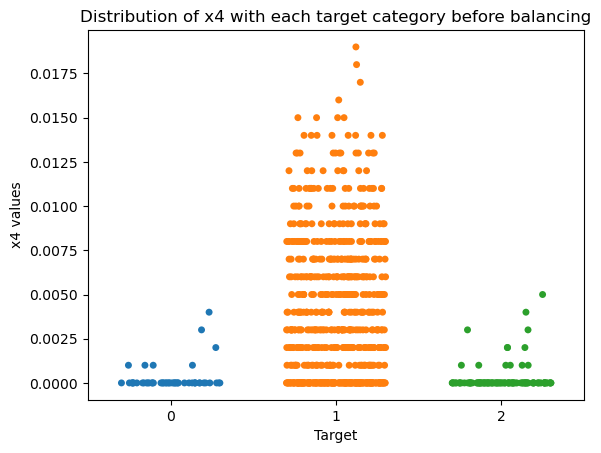

<Figure size 640x480 with 0 Axes>

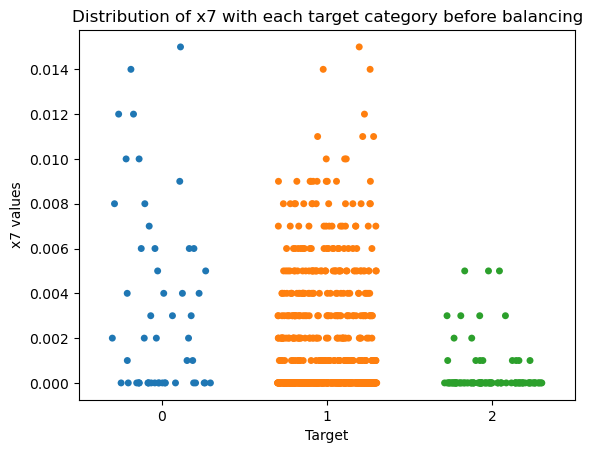

<Figure size 640x480 with 0 Axes>

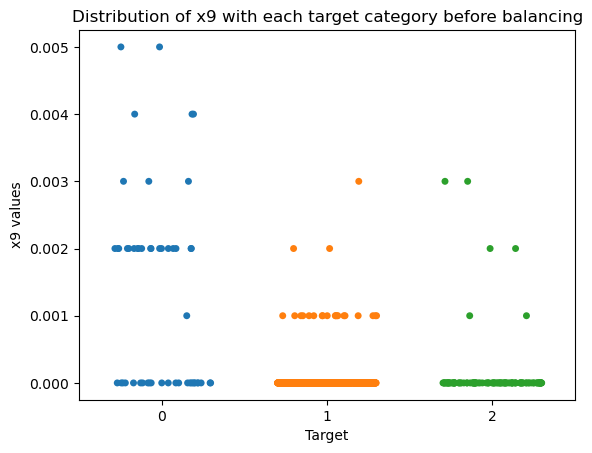

<Figure size 640x480 with 0 Axes>

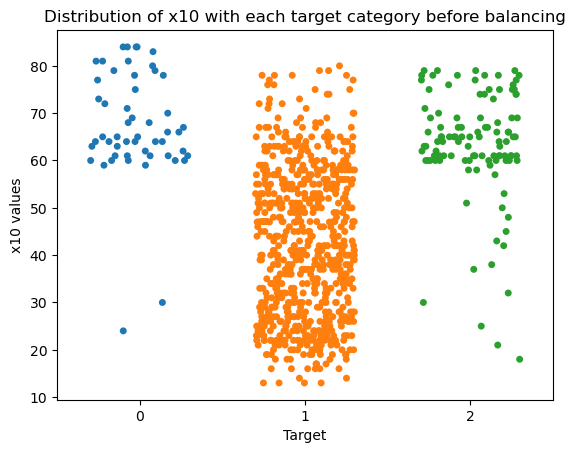

<Figure size 640x480 with 0 Axes>

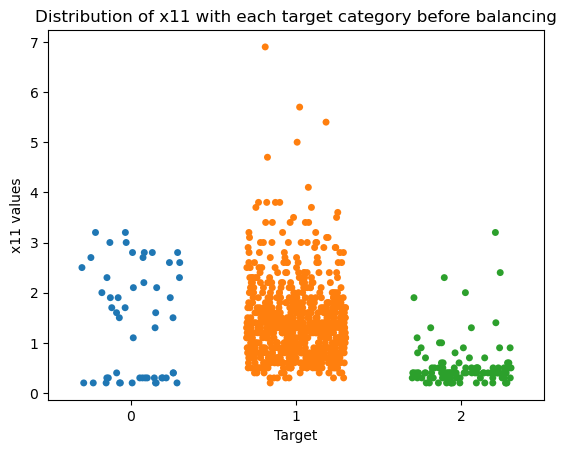

<Figure size 640x480 with 0 Axes>

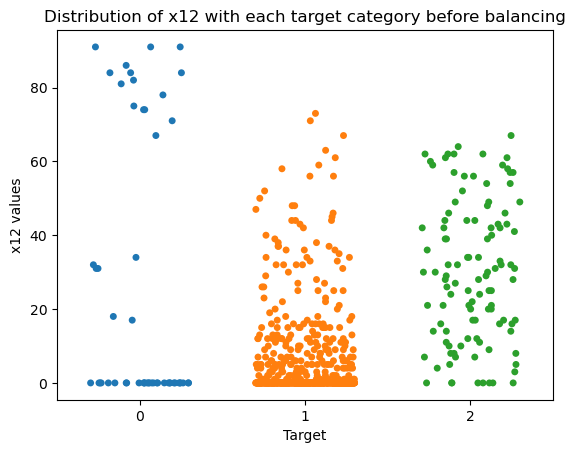

<Figure size 640x480 with 0 Axes>

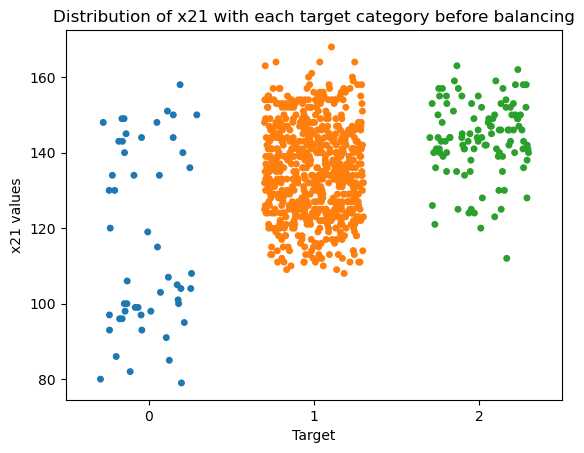

<Figure size 640x480 with 0 Axes>

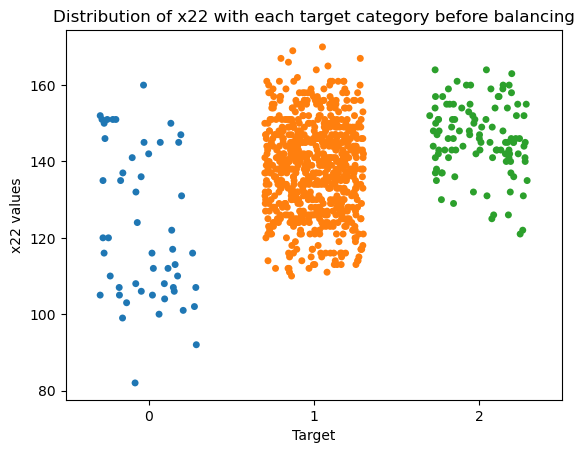

<Figure size 640x480 with 0 Axes>

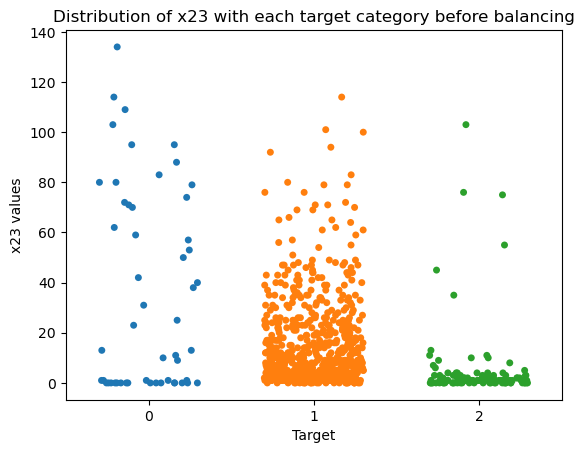

<Figure size 640x480 with 0 Axes>

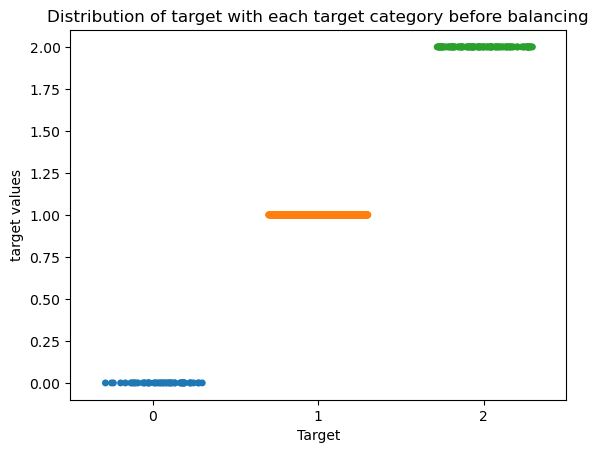

<Figure size 640x480 with 0 Axes>

In [57]:
for column in resampling[selected_cols]:
    plt.figure()
    sns.stripplot(x=resampling['target'],y=resampling[column],data=resampling, jitter=0.3)
    plt.xlabel('Target')
    plt.ylabel(column + " values")
    plt.title('Distribution of ' + column + ' with each target category before balancing')
    plt.show()
    sns.despine()

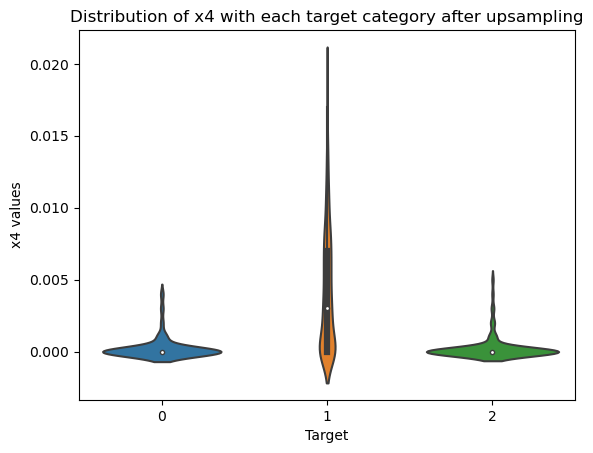

<Figure size 640x480 with 0 Axes>

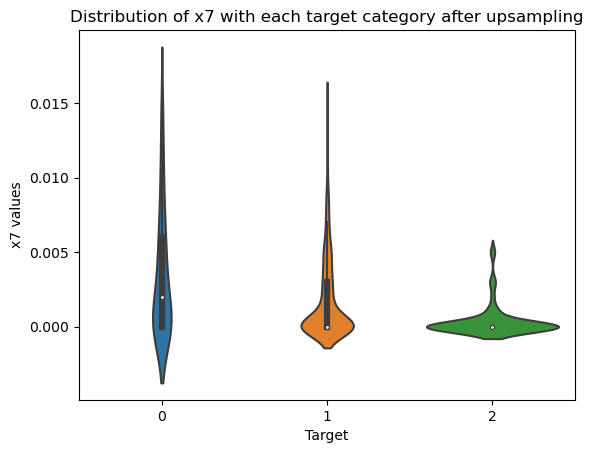

<Figure size 640x480 with 0 Axes>

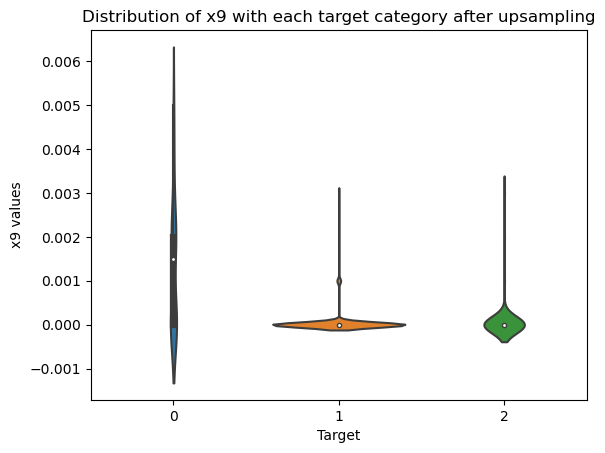

<Figure size 640x480 with 0 Axes>

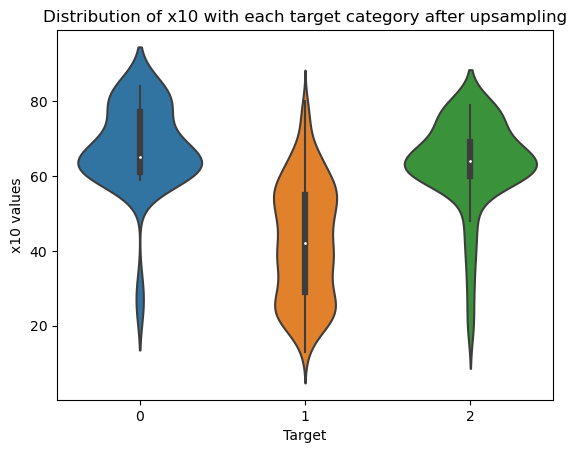

<Figure size 640x480 with 0 Axes>

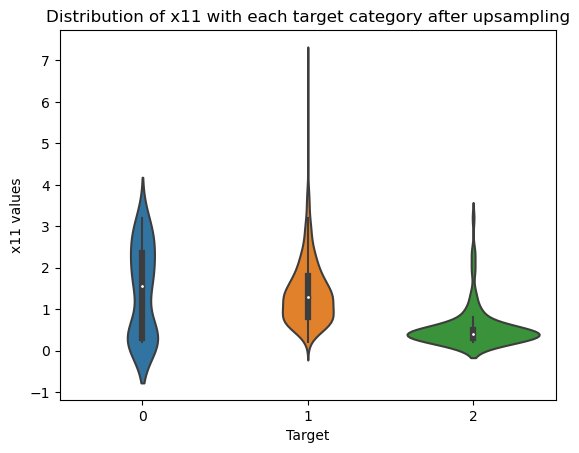

<Figure size 640x480 with 0 Axes>

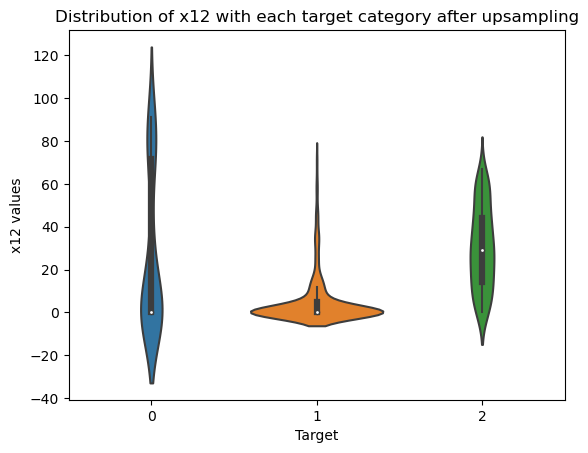

<Figure size 640x480 with 0 Axes>

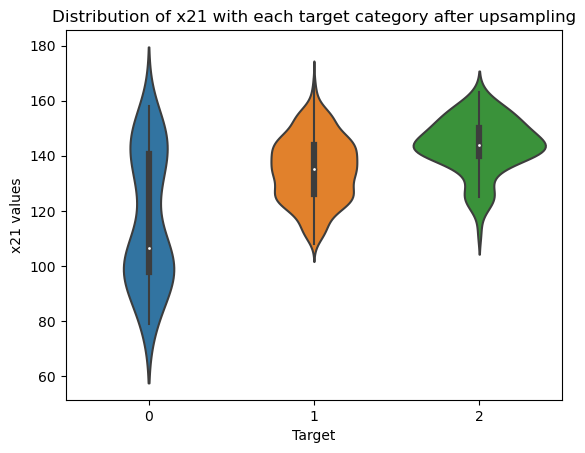

<Figure size 640x480 with 0 Axes>

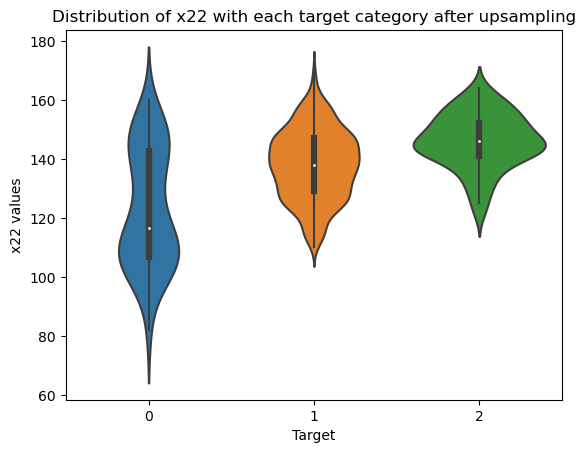

<Figure size 640x480 with 0 Axes>

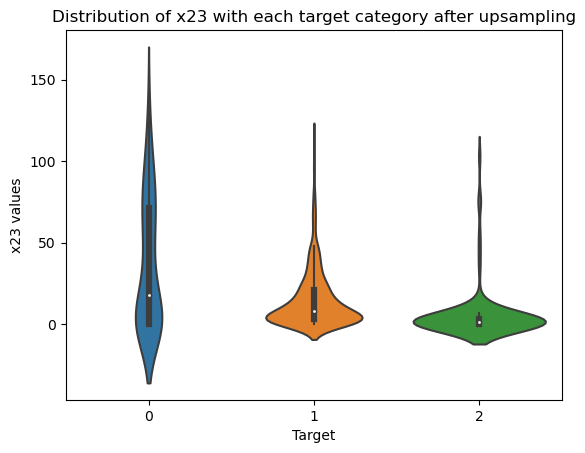

<Figure size 640x480 with 0 Axes>

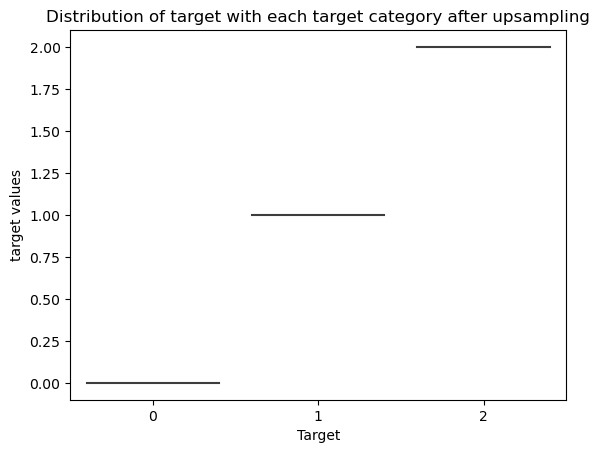

<Figure size 640x480 with 0 Axes>

In [58]:
for column in resampling[selected_cols]:
    plt.figure()
    sns.violinplot(x=resampling['target'],y=resampling[column],data=resampling)
    plt.xlabel('Target')
    plt.ylabel(column + " values")
    plt.title('Distribution of ' + column + ' with each target category after upsampling')
    plt.savefig('Upsampling of '+column+'.png')
    plt.show()
    sns.despine()

### Upsampling 

In [59]:
# Upsample minority class (moderate)
moderate_upsampled = resample(minority_class_moderate, replace=True, n_samples=701, random_state=123)

# Upsample minority class (moderate)
high_upsampled = resample(minority_class_high, replace=True, n_samples=701, random_state=123)

# Combine majority class with upsampled minority classes
upsampled = pd.concat([majority_class_low, moderate_upsampled, high_upsampled])

# Show dataset statistics
print(upsampled.describe())
 
# Display new class counts
upsampled.target.value_counts()

                x4           x7           x9          x10          x11  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean      0.001549     0.001840     0.000541    57.509650     1.143129   
std       0.003022     0.003114     0.001125    16.832273     0.913817   
min       0.000000     0.000000     0.000000    13.000000     0.200000   
25%       0.000000     0.000000     0.000000    49.000000     0.400000   
50%       0.000000     0.000000     0.000000    61.000000     0.800000   
75%       0.002000     0.003000     0.000000    67.000000     1.700000   
max       0.019000     0.015000     0.005000    84.000000     6.900000   

               x12          x21          x22          x23       target  
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000  
mean     19.985735   131.196386   135.261531    19.806467     1.000000  
std      26.476059    20.005493    17.263533    30.281193     0.816691  
min       0.000000    79.000000    82.000

1    701
2    701
0    701
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

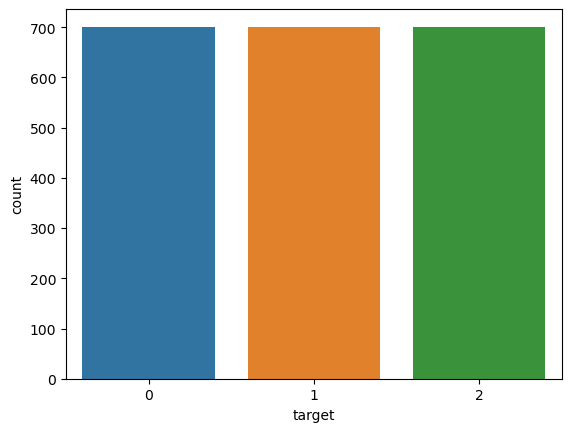

In [60]:
sns.countplot(x= 'target', data=upsampled)

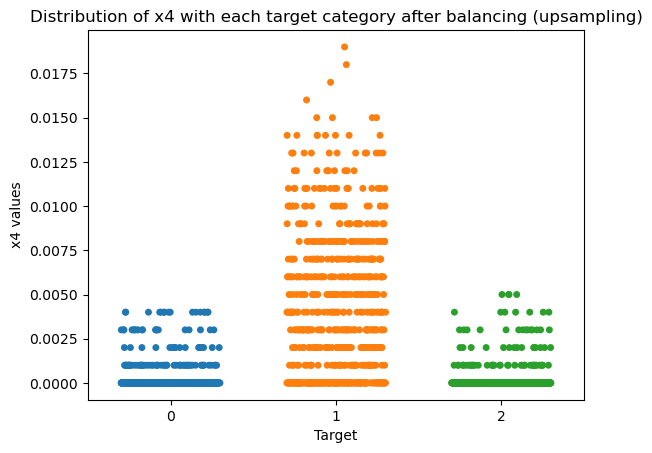

<Figure size 640x480 with 0 Axes>

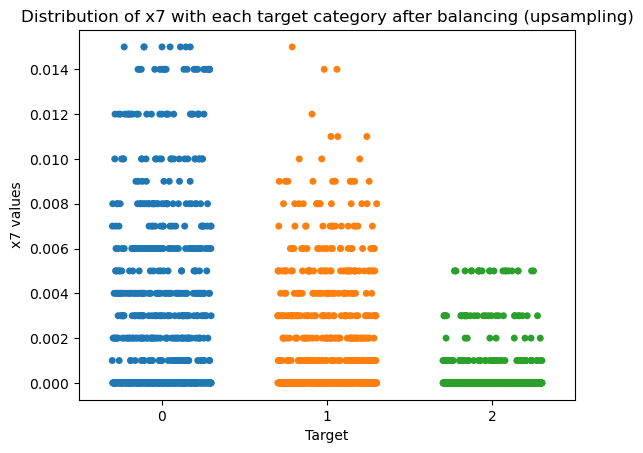

<Figure size 640x480 with 0 Axes>

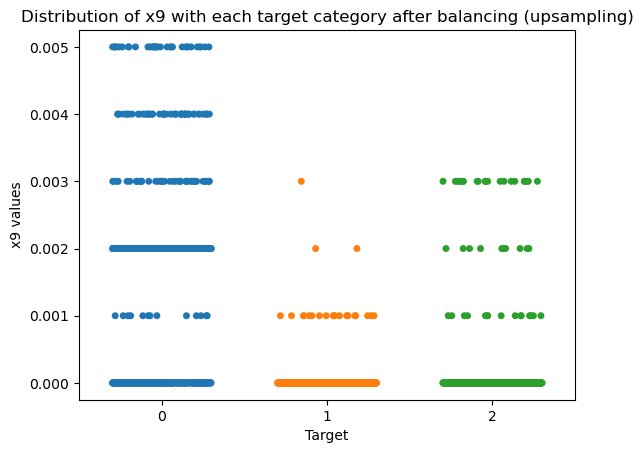

<Figure size 640x480 with 0 Axes>

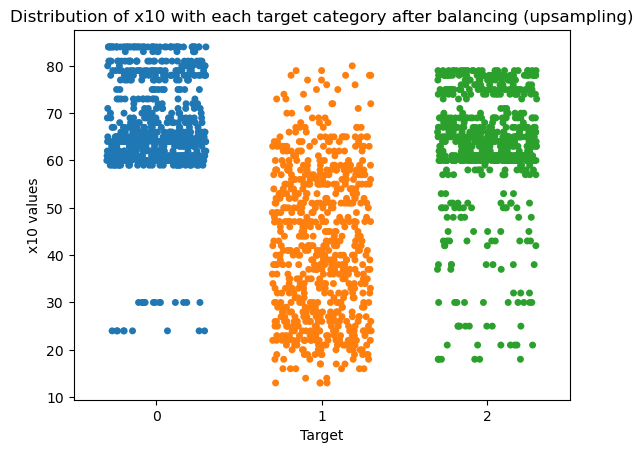

<Figure size 640x480 with 0 Axes>

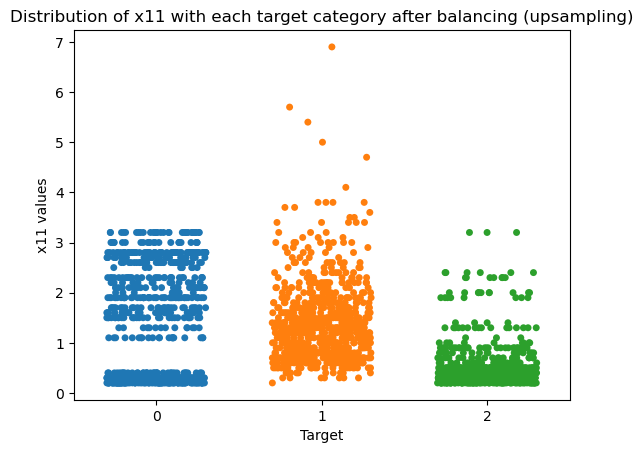

<Figure size 640x480 with 0 Axes>

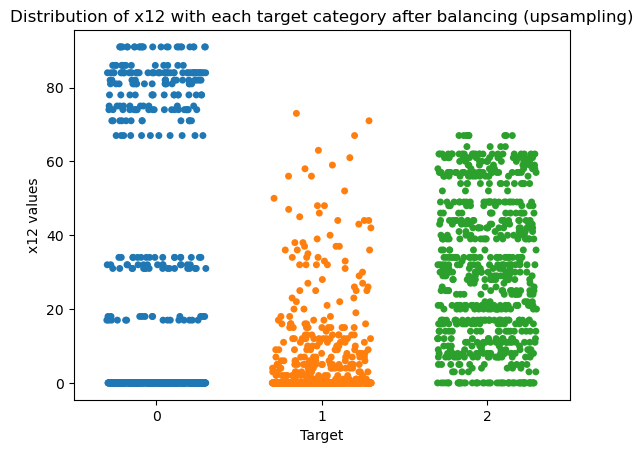

<Figure size 640x480 with 0 Axes>

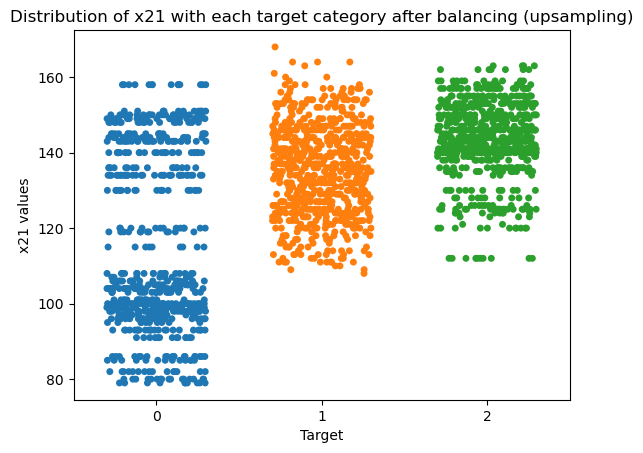

<Figure size 640x480 with 0 Axes>

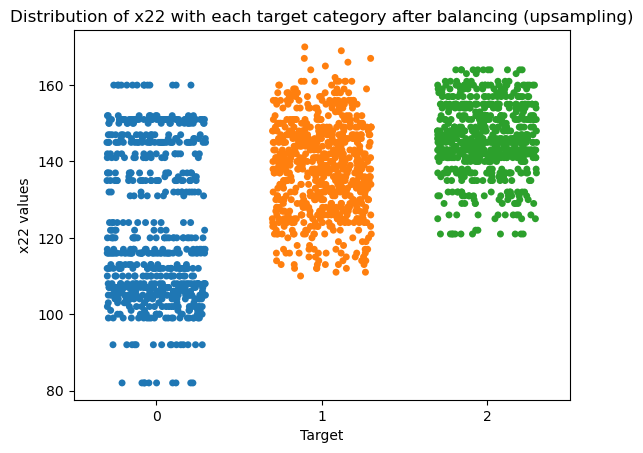

<Figure size 640x480 with 0 Axes>

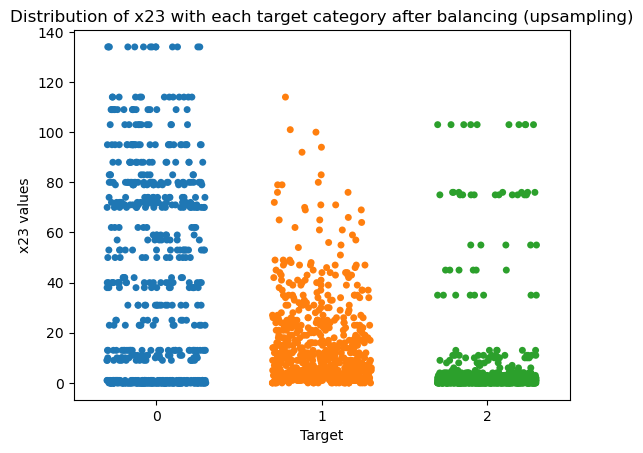

<Figure size 640x480 with 0 Axes>

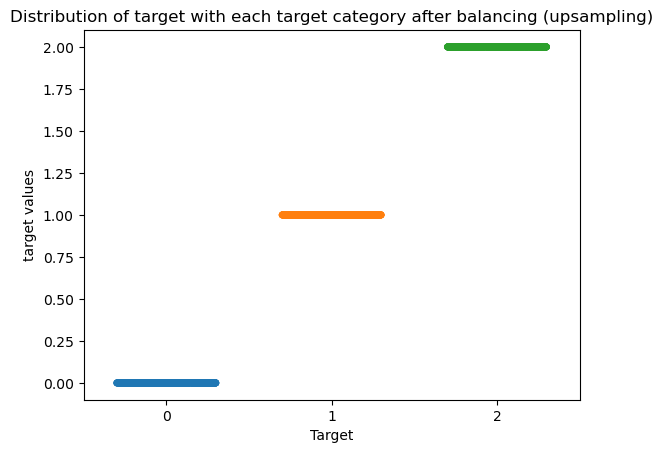

<Figure size 640x480 with 0 Axes>

In [61]:
# Data after balancing (upsampling)

for column in upsampled[selected_cols]:
    plt.figure()
    sns.stripplot(x=upsampled['target'],y=upsampled[column],data=upsampled, jitter=0.3)
    plt.xlabel('Target')
    plt.ylabel(column + " values")
    plt.title('Distribution of ' + column + ' with each target category after balancing (upsampling)')
    plt.show()
    sns.despine()

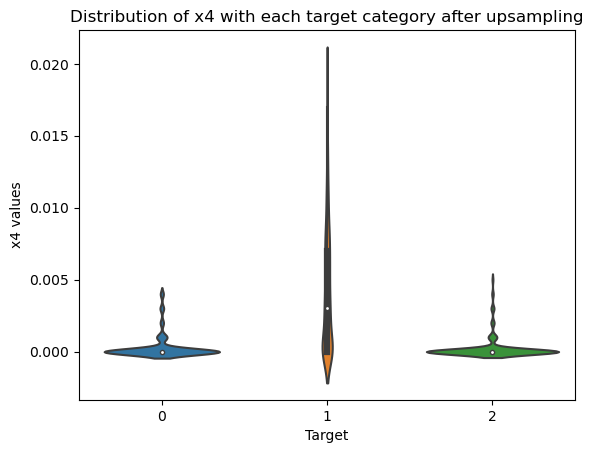

<Figure size 640x480 with 0 Axes>

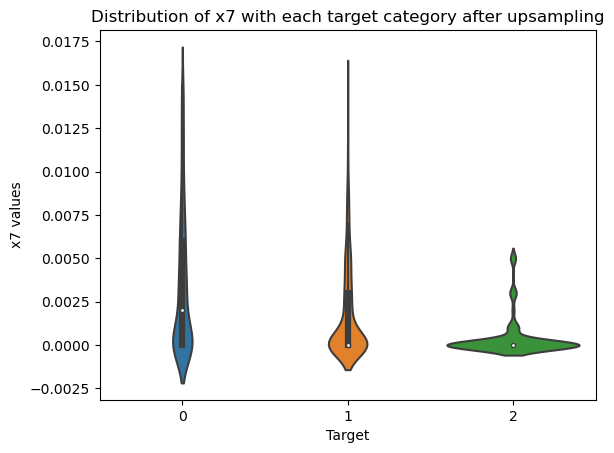

<Figure size 640x480 with 0 Axes>

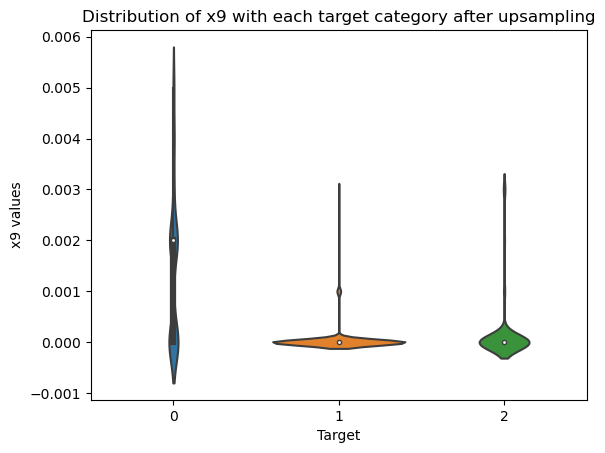

<Figure size 640x480 with 0 Axes>

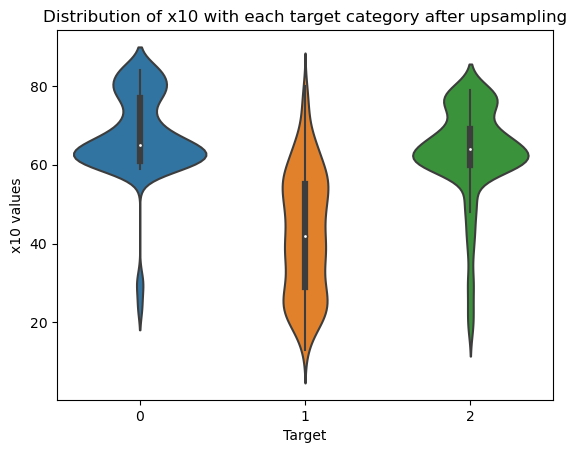

<Figure size 640x480 with 0 Axes>

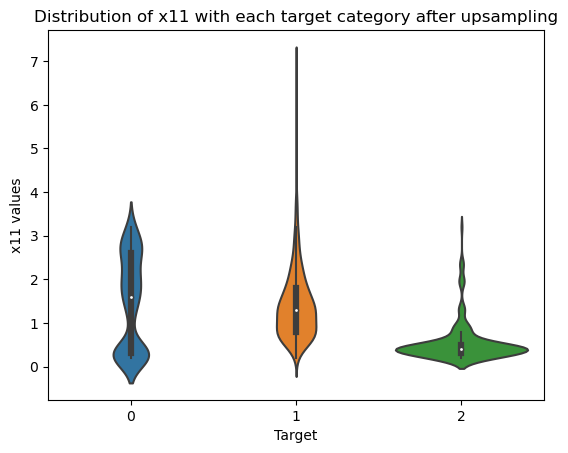

<Figure size 640x480 with 0 Axes>

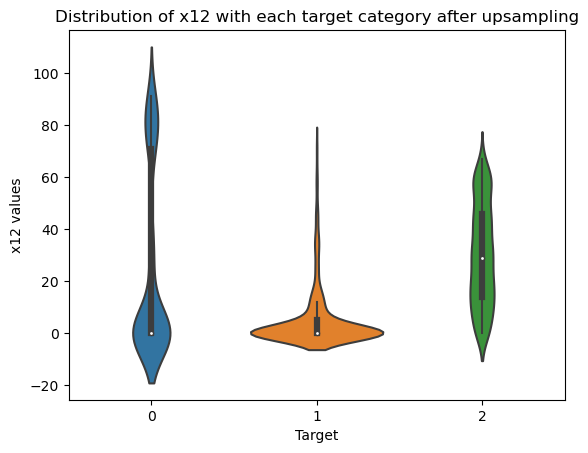

<Figure size 640x480 with 0 Axes>

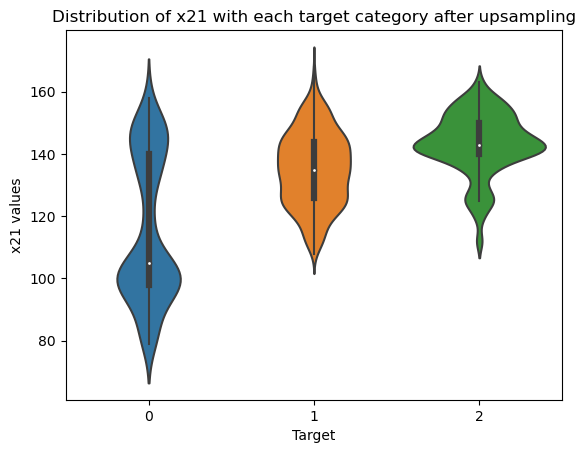

<Figure size 640x480 with 0 Axes>

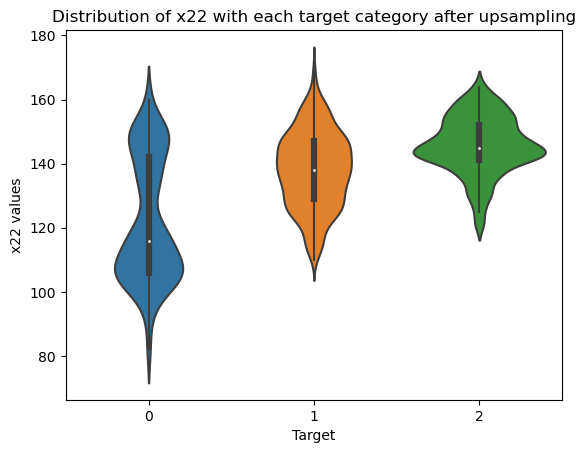

<Figure size 640x480 with 0 Axes>

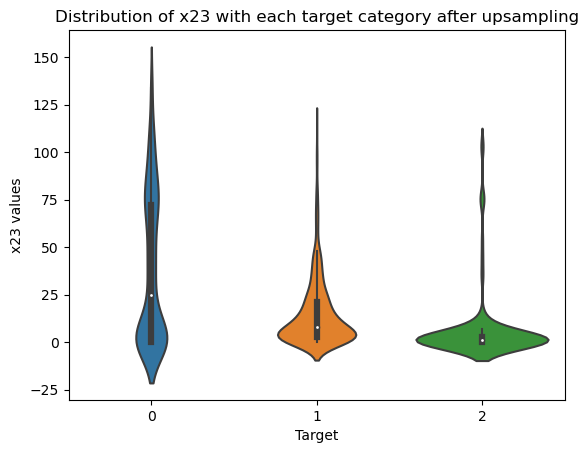

<Figure size 640x480 with 0 Axes>

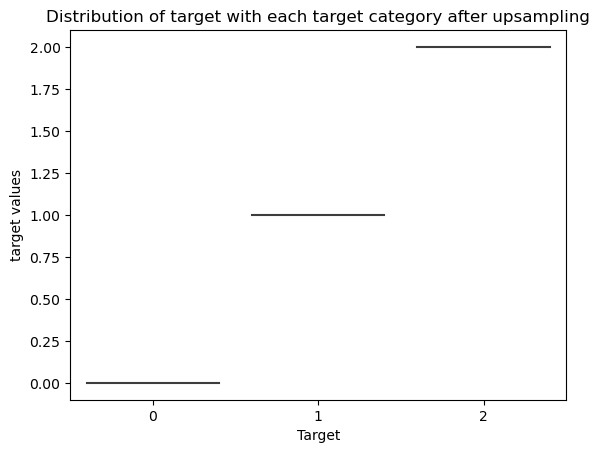

<Figure size 640x480 with 0 Axes>

In [62]:
for column in upsampled[selected_cols]:
    plt.figure()
    sns.violinplot(x=upsampled['target'],y=upsampled[column],data=upsampled)
    plt.xlabel('Target')
    plt.ylabel(column + " values")
    plt.title('Distribution of ' + column + ' with each target category after upsampling')
    plt.savefig('Upsampling of '+column+'.png')
    plt.show()
    sns.despine()

### Downsampling

In [63]:
# Downsample majority class (low)
majority_downsampled_low = resample(majority_class_low, replace=False, n_samples=52, random_state=123) 

# Downsample majority class (moderate)
majority_downsampled_moderate = resample(majority_class_moderate, replace=False, n_samples=52, random_state=123) 
    
# Combine minority class with downsampled majority class
downsampled = pd.concat([majority_downsampled_low, majority_downsampled_moderate, minority_class_high])

#Display description of downsampled data
print(downsampled.describe())
 
# Display new class counts
downsampled.target.value_counts()

               x4          x7          x9         x10         x11         x12  \
count  156.000000  156.000000  156.000000  156.000000  156.000000  156.000000   
mean     0.001506    0.001840    0.000455   57.507015    1.132051   21.256410   
std      0.002873    0.003079    0.001043   16.942982    0.957280   27.321709   
min      0.000000    0.000000    0.000000   16.000000    0.200000    0.000000   
25%      0.000000    0.000000    0.000000   46.820809    0.400000    0.000000   
50%      0.000000    0.000000    0.000000   61.000000    0.800000    7.000000   
75%      0.002000    0.003000    0.000000   67.250000    1.700000   39.000000   
max      0.014000    0.015000    0.005000   84.000000    5.400000   91.000000   

              x21         x22         x23      target  
count  156.000000  156.000000  156.000000  156.000000  
mean   132.339744  136.064103   17.576923    1.000000  
std     19.920648   17.283846   28.034320    0.819126  
min     79.000000   82.000000    0.000000    0

1    52
2    52
0    52
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

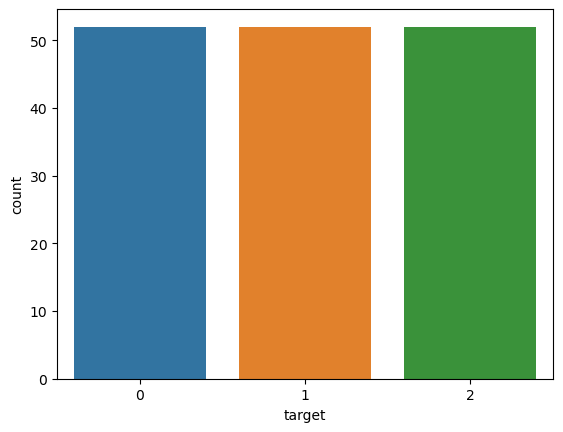

In [64]:
sns.countplot(x= 'target', data=downsampled)

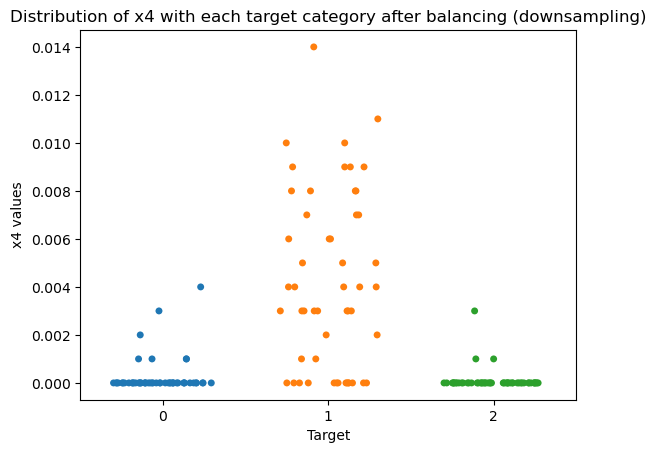

<Figure size 640x480 with 0 Axes>

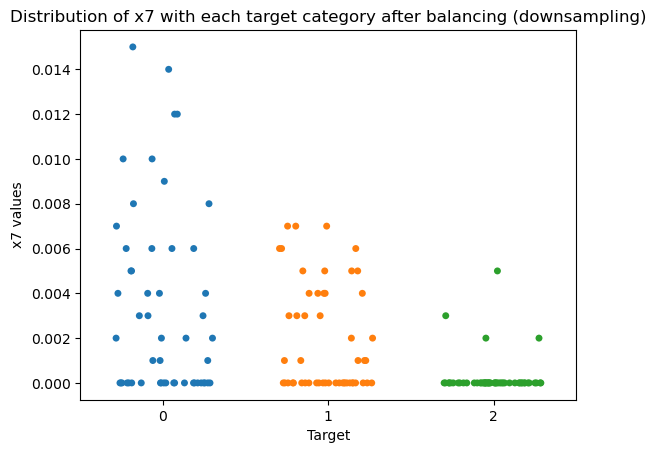

<Figure size 640x480 with 0 Axes>

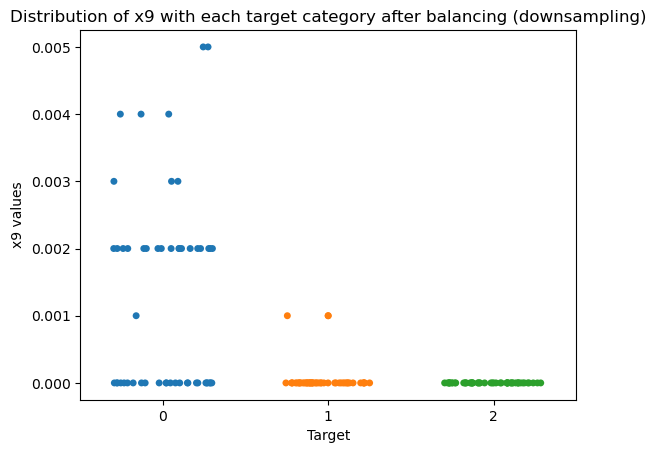

<Figure size 640x480 with 0 Axes>

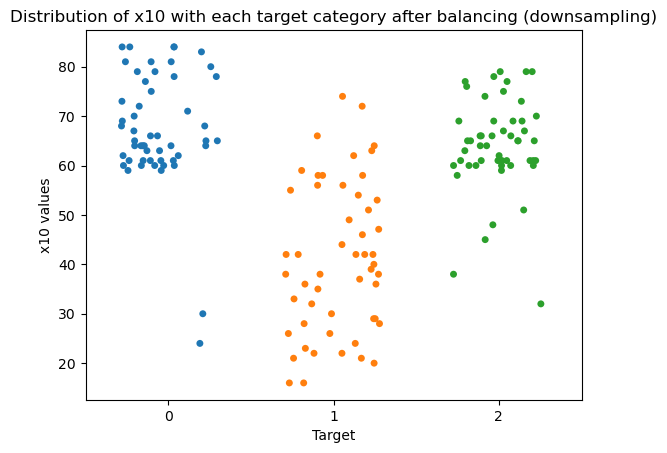

<Figure size 640x480 with 0 Axes>

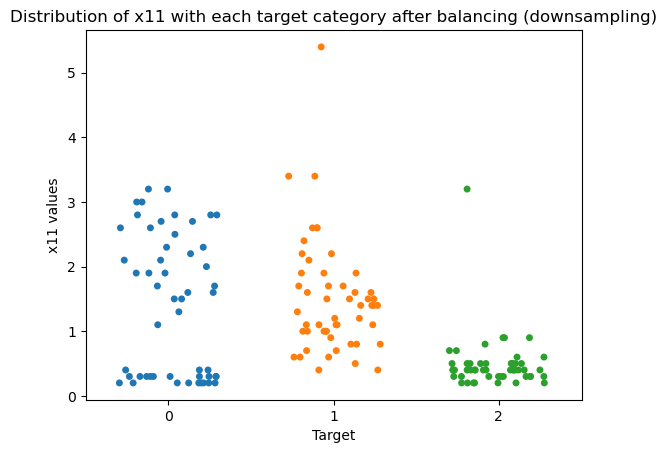

<Figure size 640x480 with 0 Axes>

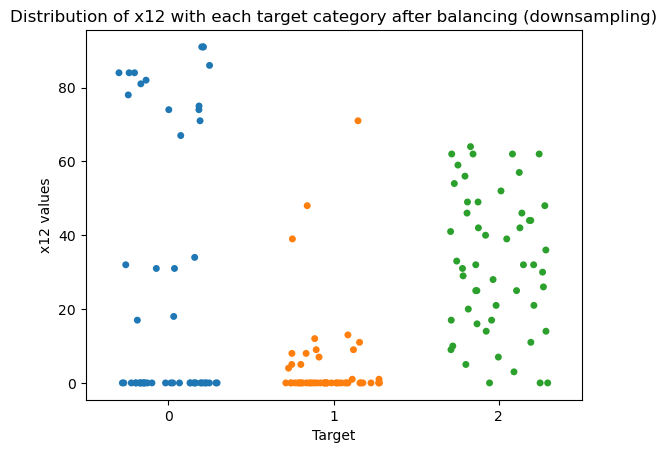

<Figure size 640x480 with 0 Axes>

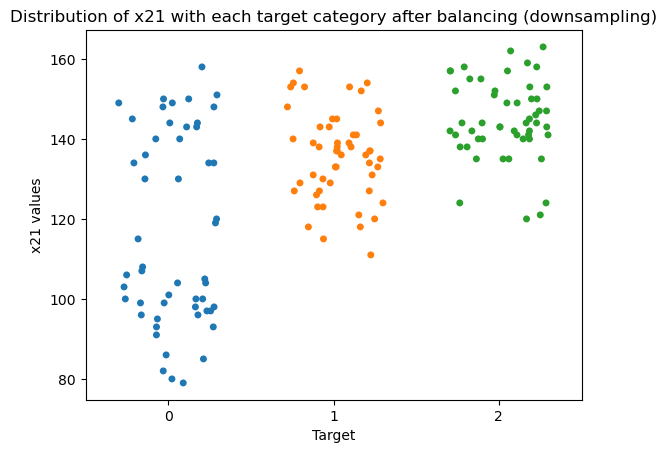

<Figure size 640x480 with 0 Axes>

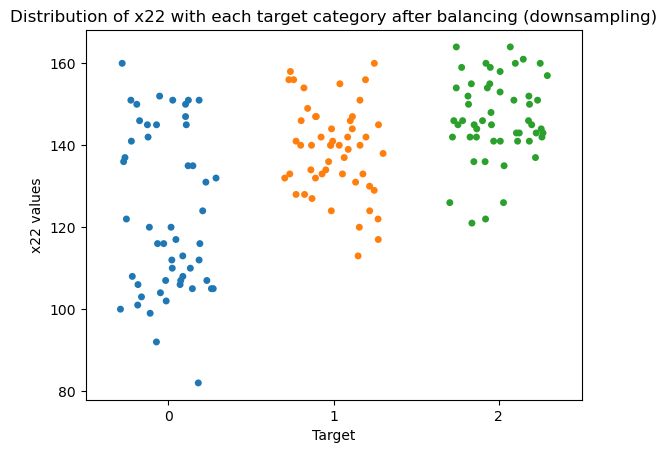

<Figure size 640x480 with 0 Axes>

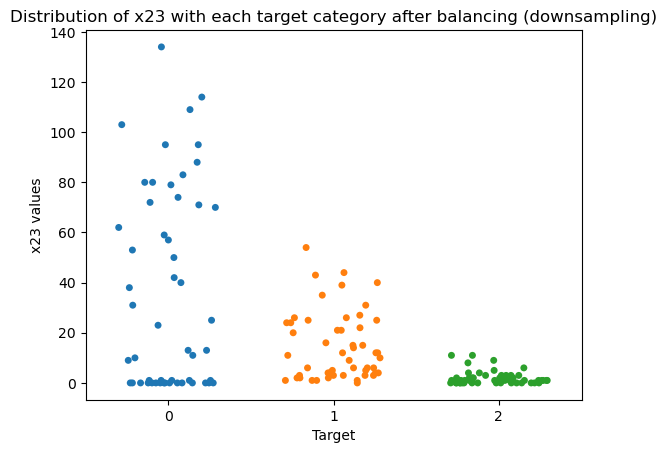

<Figure size 640x480 with 0 Axes>

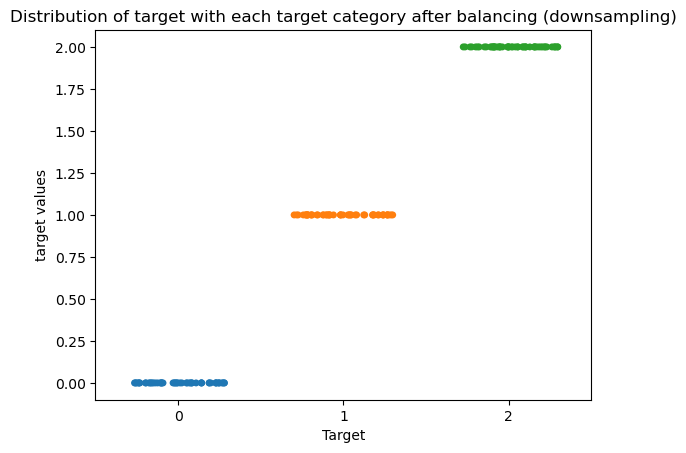

<Figure size 640x480 with 0 Axes>

In [65]:
# Data after downsampling

for column in downsampled[selected_cols]:
    plt.figure()
    sns.stripplot(x=downsampled['target'],y=downsampled[column],data=downsampled, jitter=0.3)
    plt.xlabel('Target')
    plt.ylabel(column + " values")
    plt.title('Distribution of ' + column + ' with each target category after balancing (downsampling)')
    plt.show()
    sns.despine()

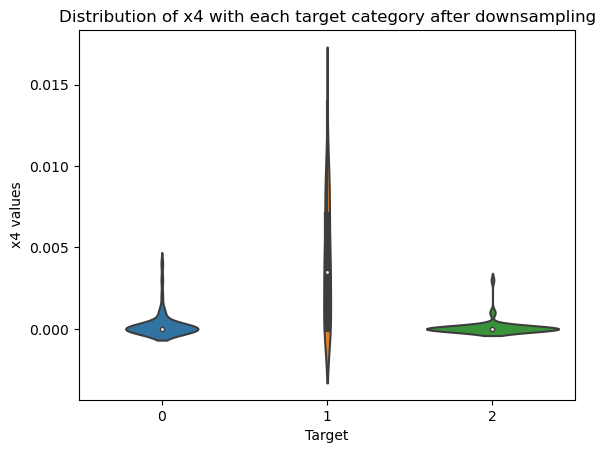

<Figure size 640x480 with 0 Axes>

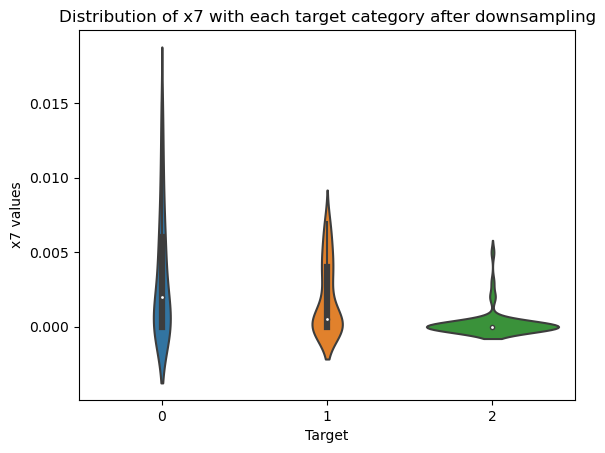

<Figure size 640x480 with 0 Axes>

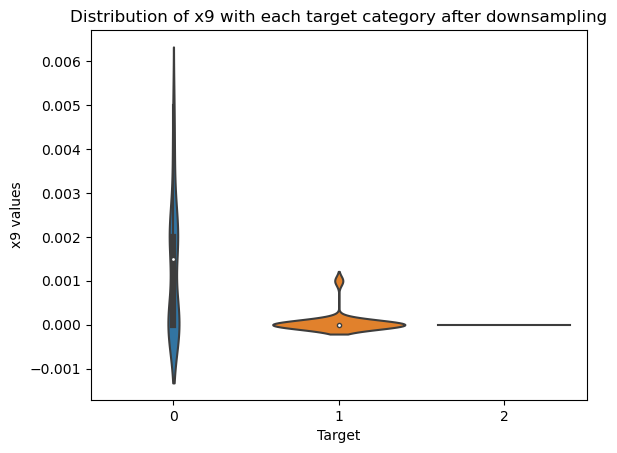

<Figure size 640x480 with 0 Axes>

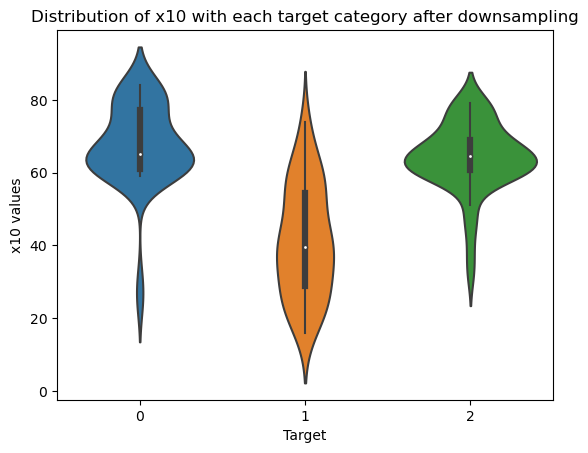

<Figure size 640x480 with 0 Axes>

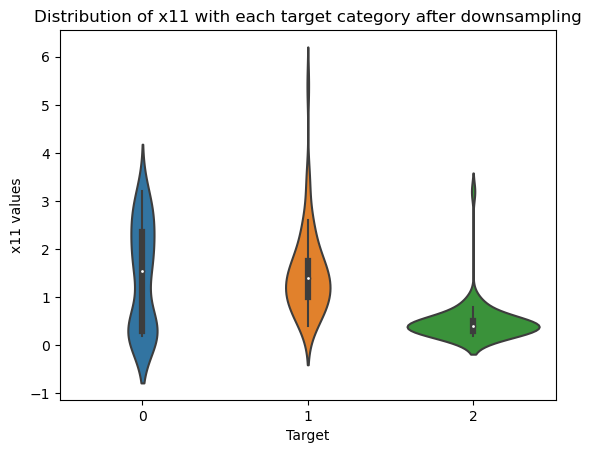

<Figure size 640x480 with 0 Axes>

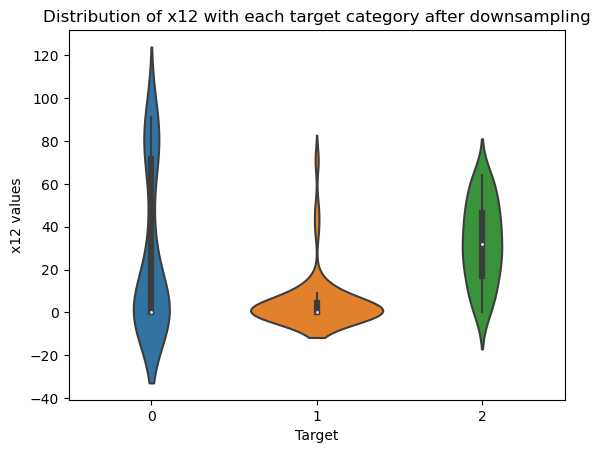

<Figure size 640x480 with 0 Axes>

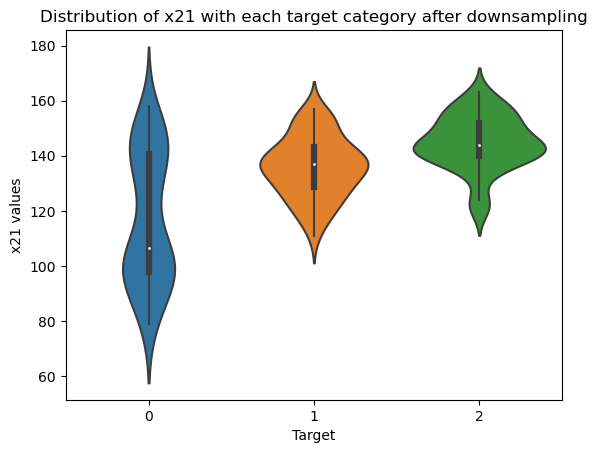

<Figure size 640x480 with 0 Axes>

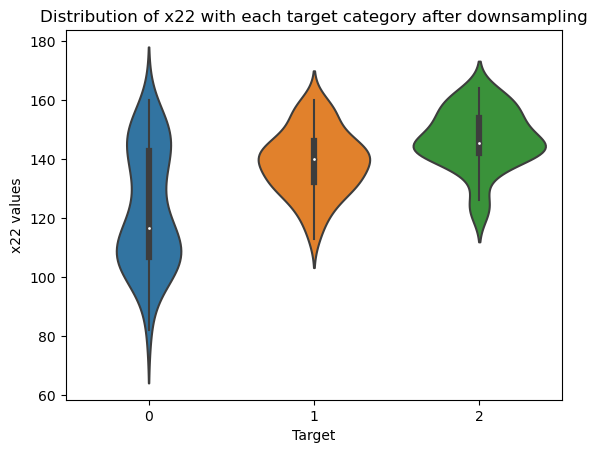

<Figure size 640x480 with 0 Axes>

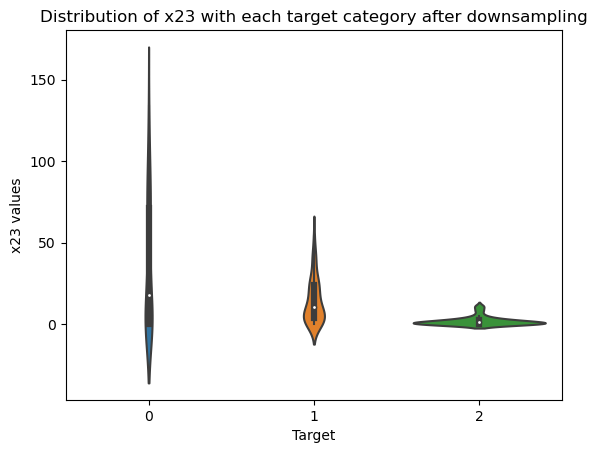

<Figure size 640x480 with 0 Axes>

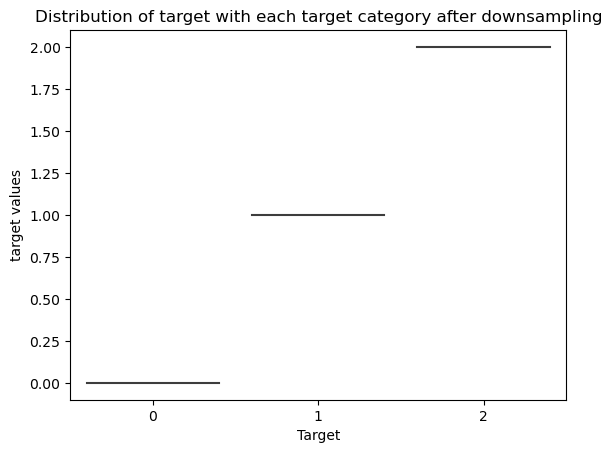

<Figure size 640x480 with 0 Axes>

In [66]:
for column in downsampled[selected_cols]:
    plt.figure()
    sns.violinplot(x=downsampled['target'],y=downsampled[column],data=downsampled)
    plt.xlabel('Target')
    plt.ylabel(column + " values")
    plt.title('Distribution of ' + column + ' with each target category after downsampling')
    plt.show()
    sns.despine()

In [67]:
# Upsample minority class (high)
high_upsampled = resample(minority_class_high, replace=True, n_samples=109, random_state=123)

# Downsample majority class (low)
low_downsampled = resample(majority_class_low, replace=True, n_samples=109, random_state=123)

# Combine majority class with upsampled minority classes
balanced = pd.concat([high_upsampled, low_downsampled, moderate_class])

# Show dataset statistics
print(balanced.describe())
 
# Display new class counts
balanced.target.value_counts()

               x4          x7          x9        x10         x11         x12  \
count  327.000000  327.000000  327.000000  327.00000  327.000000  327.000000   
mean     0.001532    0.001749    0.000517   56.56298    1.166361   19.620795   
std      0.003041    0.003013    0.001090   17.95279    0.961897   26.450613   
min      0.000000    0.000000    0.000000   13.00000    0.200000    0.000000   
25%      0.000000    0.000000    0.000000   42.50000    0.400000    0.000000   
50%      0.000000    0.000000    0.000000   61.00000    0.800000    4.000000   
75%      0.001000    0.003000    0.000000   68.00000    1.700000   32.500000   
max      0.018000    0.015000    0.005000   84.00000    5.700000   91.000000   

              x21         x22         x23      target  
count  327.000000  327.000000  327.000000  327.000000  
mean   130.816514  134.623853   19.391437    1.000000  
std     19.941863   17.313842   30.174538    0.817748  
min     79.000000   82.000000    0.000000    0.000000  

0    109
1    109
2    109
Name: target, dtype: int64

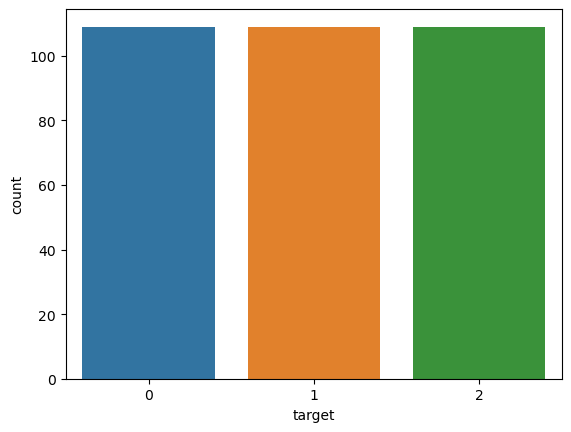

In [68]:
sns.countplot(x= 'target', data=balanced)
plt.savefig('distribution.png')

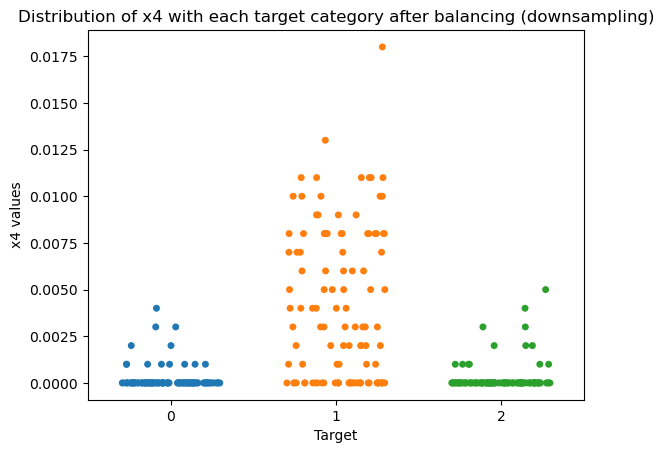

<Figure size 640x480 with 0 Axes>

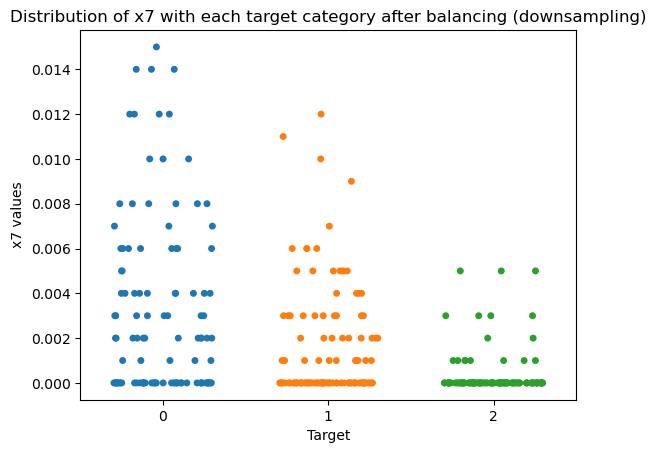

<Figure size 640x480 with 0 Axes>

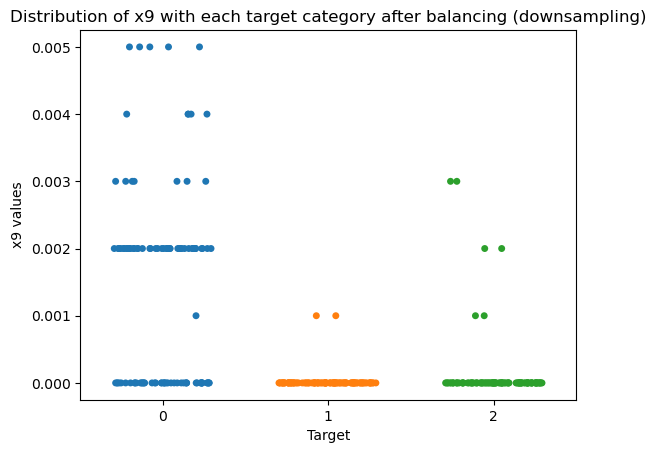

<Figure size 640x480 with 0 Axes>

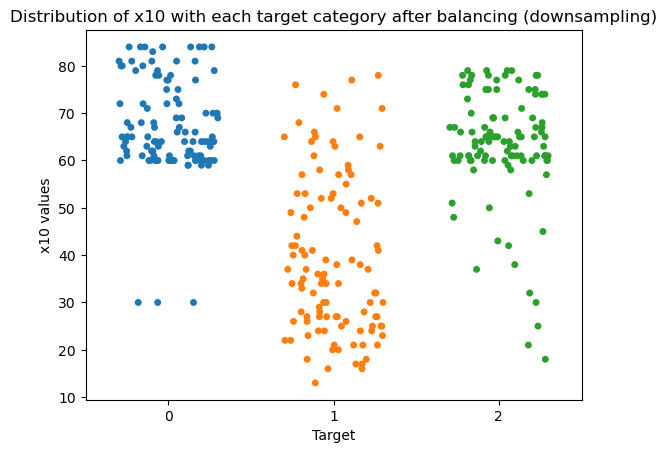

<Figure size 640x480 with 0 Axes>

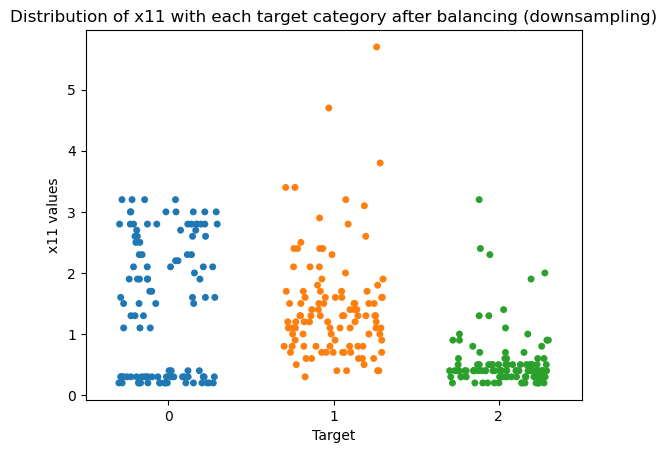

<Figure size 640x480 with 0 Axes>

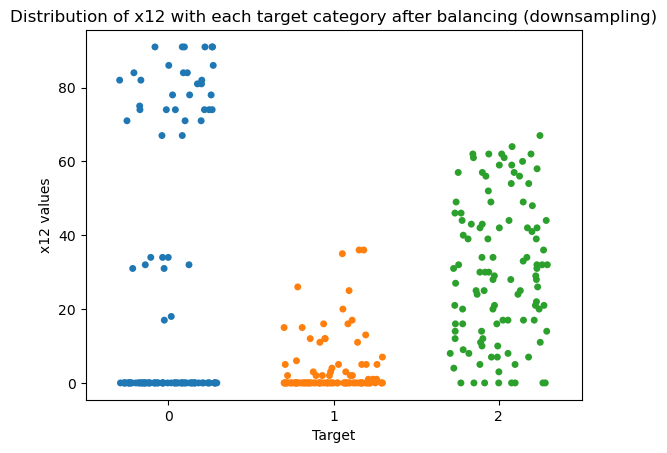

<Figure size 640x480 with 0 Axes>

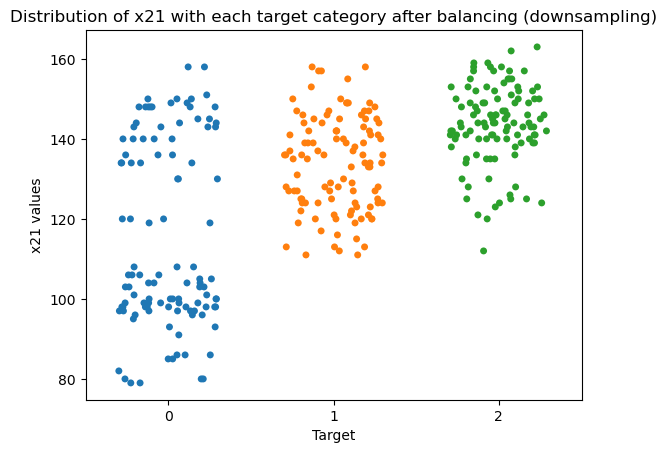

<Figure size 640x480 with 0 Axes>

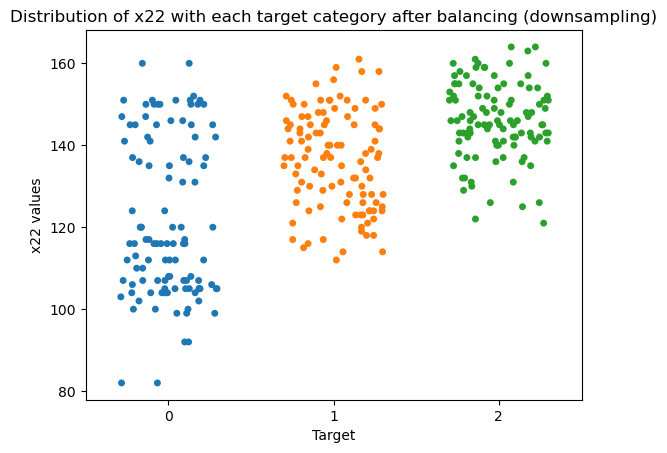

<Figure size 640x480 with 0 Axes>

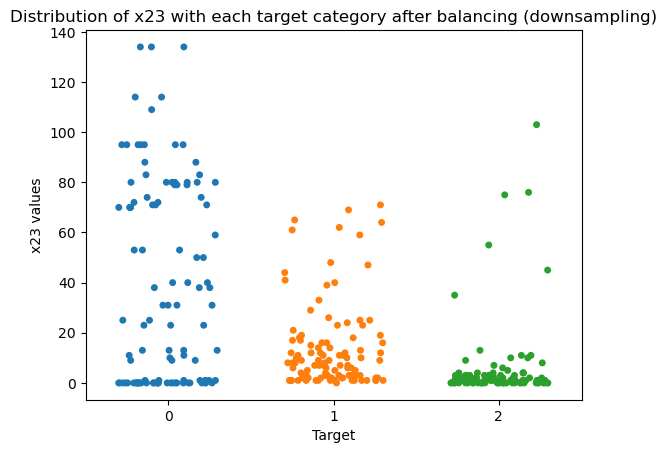

<Figure size 640x480 with 0 Axes>

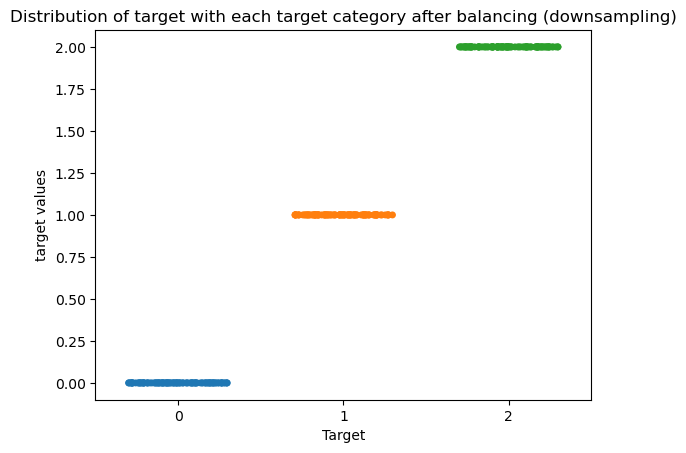

<Figure size 640x480 with 0 Axes>

In [69]:
# Data after balancing moderate

for column in balanced[selected_cols]:
    plt.figure()
    sns.stripplot(x=balanced['target'],y=balanced[column],data=balanced, jitter=0.3)
    plt.xlabel('Target')
    plt.ylabel(column + " values")
    plt.title('Distribution of ' + column + ' with each target category after balancing (downsampling)')
    plt.show()
    sns.despine()

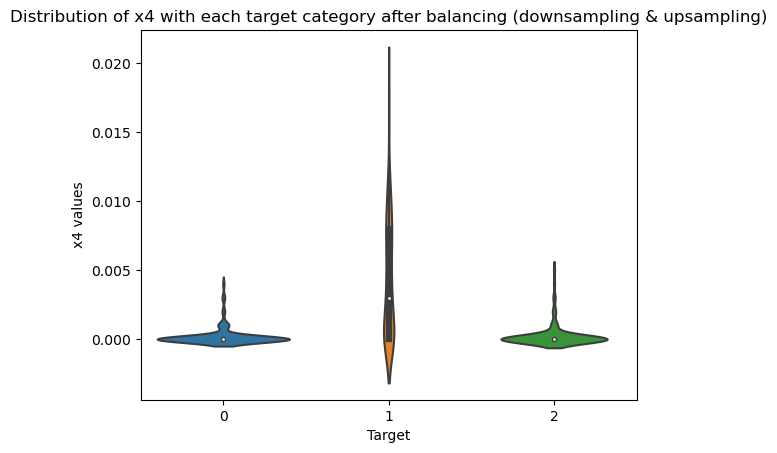

<Figure size 640x480 with 0 Axes>

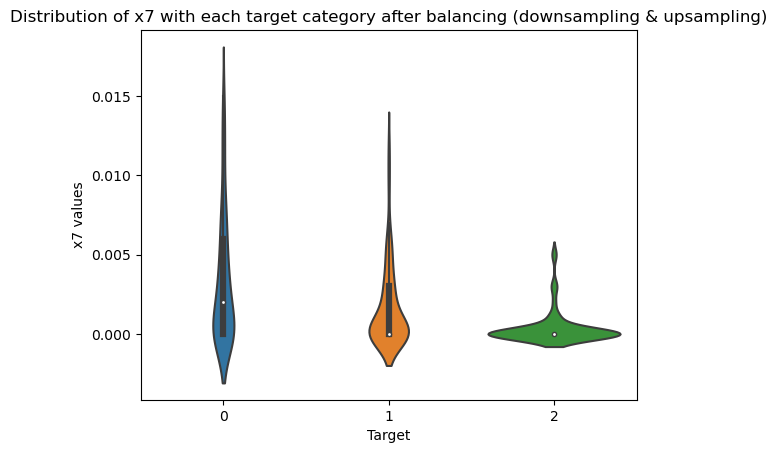

<Figure size 640x480 with 0 Axes>

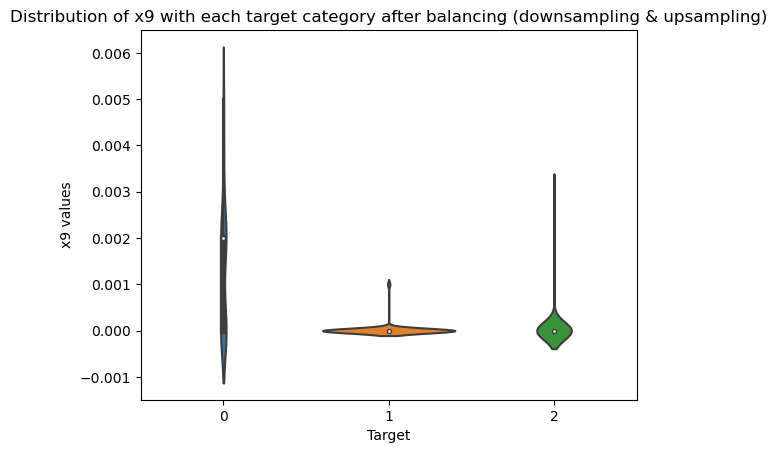

<Figure size 640x480 with 0 Axes>

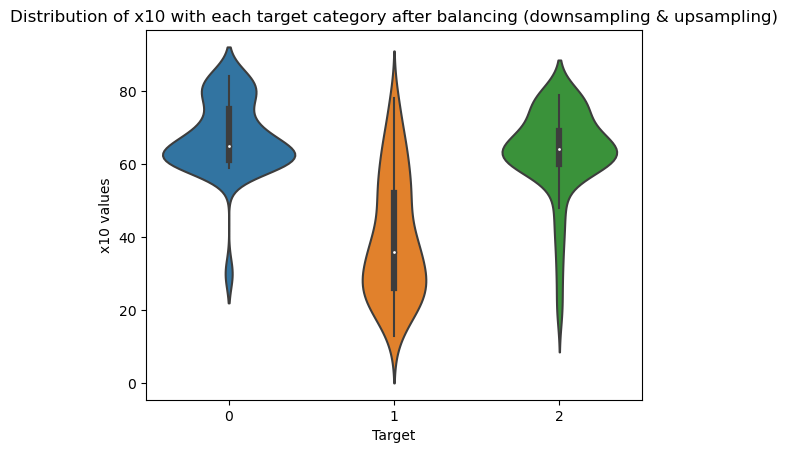

<Figure size 640x480 with 0 Axes>

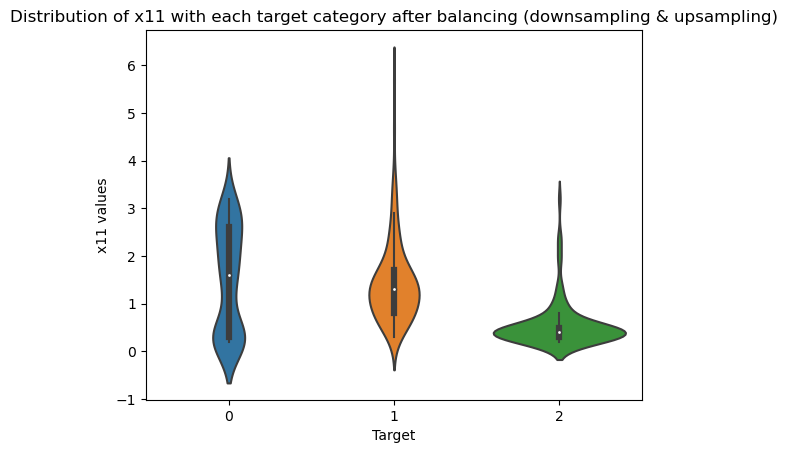

<Figure size 640x480 with 0 Axes>

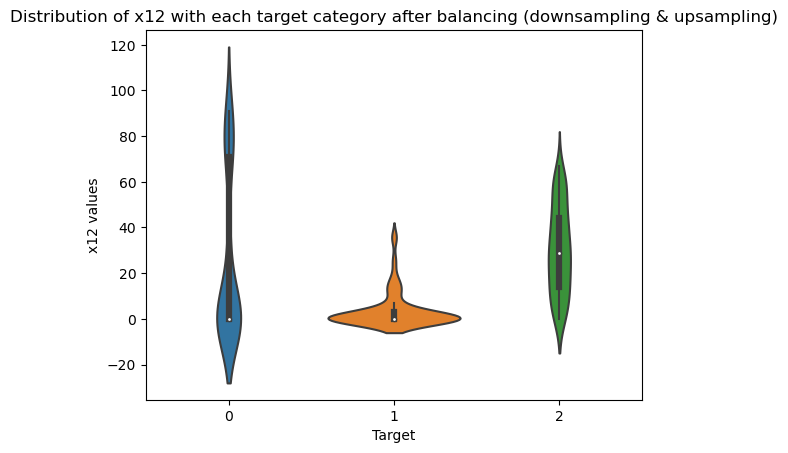

<Figure size 640x480 with 0 Axes>

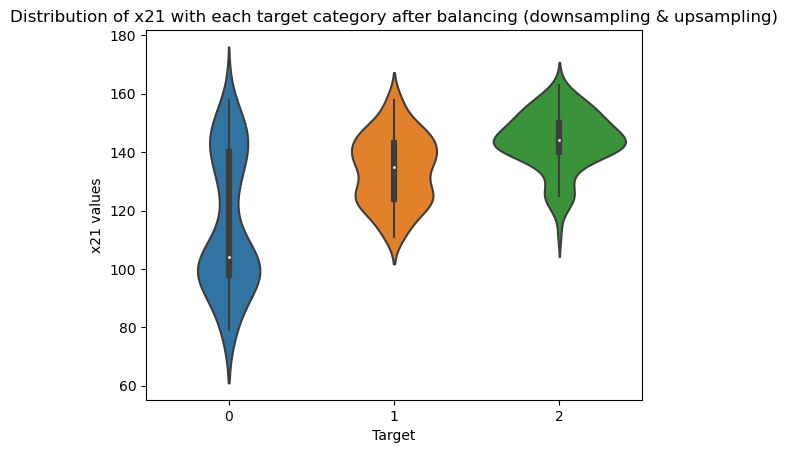

<Figure size 640x480 with 0 Axes>

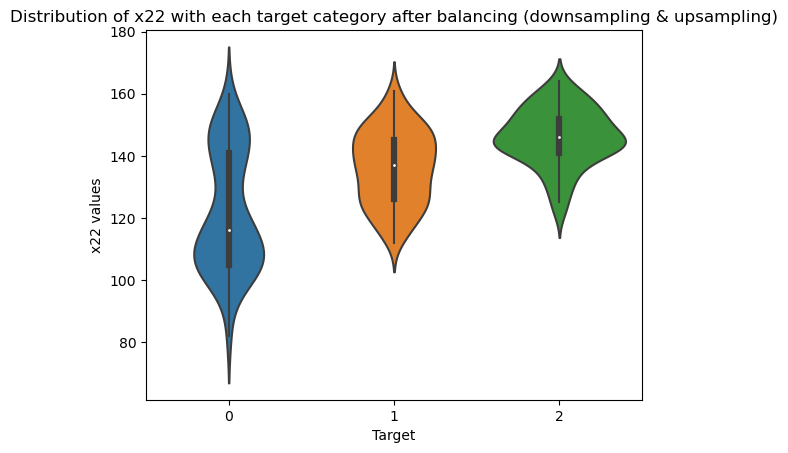

<Figure size 640x480 with 0 Axes>

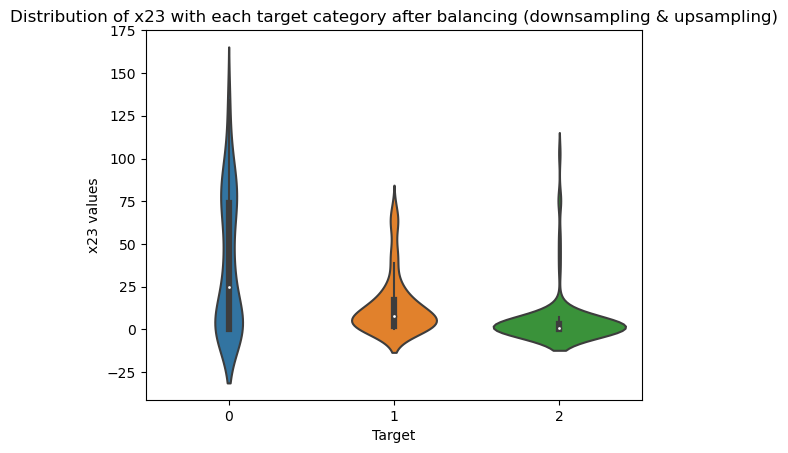

<Figure size 640x480 with 0 Axes>

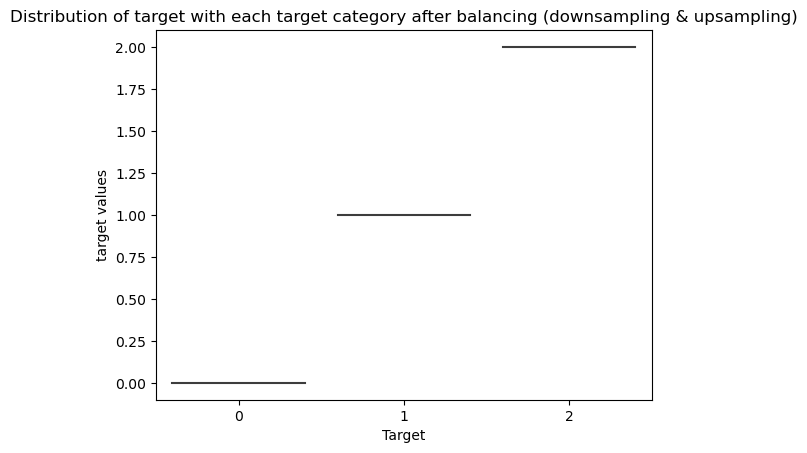

<Figure size 640x480 with 0 Axes>

In [70]:
# Data after balancing moderate

for column in balanced[selected_cols]:
    plt.figure()
    sns.violinplot(x=balanced['target'],y=balanced[column],data=balanced)
    plt.xlabel('Target')
    plt.ylabel(column + " values")
    plt.title('Distribution of ' + column + ' with each target category after balancing (downsampling & upsampling)')
    plt.savefig('Balanced '+column+'.png')
    plt.show()
    sns.despine()

## Model Training 

In [71]:
#Making a copy of the balanced data and assigning it to a train variable for model training
health_train = upsampled.copy()
health_X = health_train[wo_target]
health_y = health_train['target']
health_y

806     1
1284    1
1021    1
803     1
523     1
       ..
54      0
1044    0
984     0
832     0
737     0
Name: target, Length: 2103, dtype: int64

### Classifiers

#### KNN

In [72]:
# KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Training KNN 
knn.fit(health_X, health_y)

KNeighborsClassifier()

#### Linear SVC

In [73]:
svc = LinearSVC()
svc.fit(health_X, health_y);

/Users/miguelrosales/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Linear SGD

In [74]:
sgd = SGDClassifier()
sgd.fit(health_X, health_y);

#### NaiveBayes

In [75]:
naive_bayes = GaussianNB()
naive_bayes.fit(health_X, health_y);

#### Decision Tree

In [76]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(health_X, health_y)

DecisionTreeClassifier(criterion='entropy')

#### Random Forest Classifier

In [77]:
rf = RandomForestClassifier()
rf.fit(health_X, health_y)

RandomForestClassifier()

### Comparing Classifiers

In [78]:
classifiers = [svc, sgd, naive_bayes, clf, rf, knn]

# for each classifier get the accuracy score
scores = [accuracy_score(clf.predict(test_X), test_y) for clf in classifiers]
    
index = np.argmax(scores)

print(scores)

print(classifiers[index])
print(scores[index])

[0.8518518518518519, 0.7777777777777778, 0.7703703703703704, 0.9407407407407408, 0.9407407407407408, 0.8814814814814815]
DecisionTreeClassifier(criterion='entropy')
0.9407407407407408


/Users/miguelrosales/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### Other Comparison Methods 

In [79]:
# Preprocess via. PCA / SVD if have time

### Hyperparameter Optimisation - Random Forest

In [80]:
# #Initialising pre-pro methods
# pca = PCA()
# svd = TruncatedSVD()

# #Fitting PCA to train and val sets
# train_X_PCA = pca.fit(health_X)
# val_X_PCA = pca.fit(val_X)

# #Fitting SVD to train and val sets
# train_X_SVD = svd.fit(health_X)
# val_X_SVD = svd.fit(val_X)

In [81]:
rf_hyp = rf.fit(health_X, health_y)

#### GridSearchCV parameters

In [82]:
parameters = {
    'n_estimators': (50, 75,100),
    'max_features': ('auto', 'sqrt'),
    'max_depth': (3,4,5),
    'min_samples_split': (2,5,10),
    'min_samples_leaf': (1,2,3)
}

In [83]:
#Initialise parameters with classifier
gs_clf = GridSearchCV(rf_hyp, parameters, n_jobs=-1, cv = 5, verbose = 5)
gs_clf = gs_clf.fit(health_X, health_y) 

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [84]:
#Best parameters

print('Best scores:',gs_clf.best_score_)
print('Best params:',gs_clf.best_params_)

Best scores: 0.9605350073521095
Best params: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 75}


### Validation of Best Model - Random Forest

In [85]:
rf_classifier = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=3, min_samples_split=2, n_estimators=50)
rf_classifier.fit(val_X, val_y)

rf_classifier.score(val_X, val_y)
acc = round(rf.score(val_X, val_y) * 100, 2)
print("RandomForest accuracy (validation set):", acc)

RandomForest accuracy (validation set): 95.37


/var/folders/g5/dd0xvvm965l_rfbkt9j5blvh0000gn/T/ipykernel_39997/1398136697.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(val_X, val_y)


#### Feature Importance

In [86]:
def plot_feature_importance():
    tmp = pd.DataFrame({'Feature': wo_target, 'Feature importance': rf_classifier.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (7,4))
    plt.title('Features importance',fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.savefig('feature_importance.png')
    plt.show()  

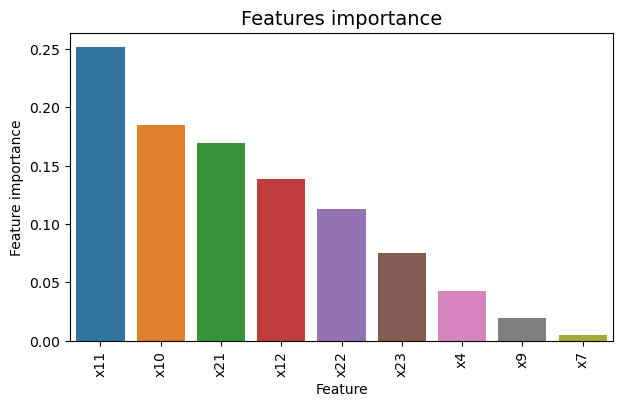

In [87]:
plot_feature_importance()

### Classification Report

In [88]:
preds = rf_classifier.predict(val_X)

report = classification_report(val_y, preds, target_names=['High_risk', 'Low_risk', 'Moderate_risk'])
print(report)
report_df = pd.DataFrame([x.split() for x in report.split('\n')[:-4]])
report_df.columns = report_df.iloc[0]
report_df = report_df[1:]
report_df.to_csv('classification_report_val_after_tunning.csv')

               precision    recall  f1-score   support

    High_risk       0.92      0.73      0.81        15
     Low_risk       0.95      0.98      0.97       169
Moderate_risk       0.86      0.78      0.82        32

     accuracy                           0.94       216
    macro avg       0.91      0.83      0.87       216
 weighted avg       0.93      0.94      0.93       216



#### Multi Class Precision and Recall

In [89]:
macro_precision = precision_score(val_y, preds, average='macro')
print('macro_precision', macro_precision)

micro_precision = precision_score(val_y, preds, average='micro')
print('micro_precision', micro_precision)

weighted_precision = precision_score(val_y, preds, average='weighted')
print('weighted_precision', weighted_precision)

macro_recall = recall_score(val_y, preds, average='macro')
print('macro_recall', macro_recall)

micro_recall = recall_score(val_y, preds, average='micro')
print('micro_recall', micro_recall)

weighted_recall = recall_score(val_y, preds, average='weighted')
print('weighted_recall', weighted_recall)

macro_precision 0.9091023535851122
micro_precision 0.9351851851851852
weighted_precision 0.9335406403940887
macro_recall 0.8322772846811309
micro_recall 0.9351851851851852
weighted_recall 0.9351851851851852


#### ROC Curve 

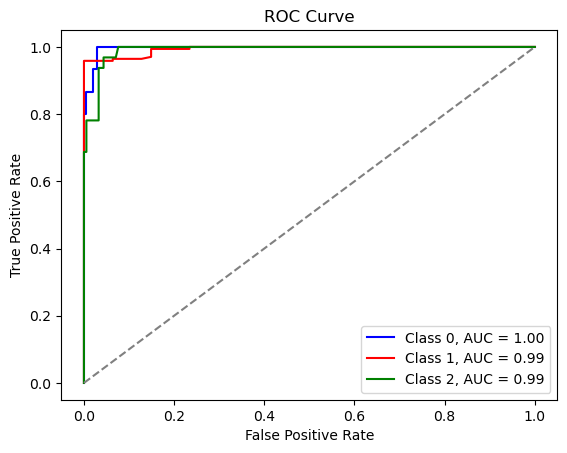

In [90]:
# Convert the multi-class labels into a binary format
y_validation_binary = label_binarize(val_y, classes=[0, 1, 2])

# Predict probabilities for the validation data
probs = rf_classifier.predict_proba(val_X)

# Compute the false positive rate (FPR), true positive rate (TPR), and AUC for each class
fpr = dict()
tpr = dict()
auc_roc = dict()
num_classes = 3

for class_idx in range(num_classes):
    class_probs = probs[:, class_idx]
    fpr[class_idx], tpr[class_idx], _ = roc_curve(y_validation_binary[:, class_idx], class_probs)
    auc_roc[class_idx] = auc(fpr[class_idx], tpr[class_idx])

# Plot the ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Define colors for each class

for class_idx, color in zip(range(num_classes), colors):
    plt.plot(fpr[class_idx], tpr[class_idx], color=color, label=f'Class {class_idx}, AUC = {auc_roc[class_idx]:.2f}')

# Plot the random chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('ROC Curve after Tunning.png')
plt.show()

#### Confusion Matrix

/Users/miguelrosales/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


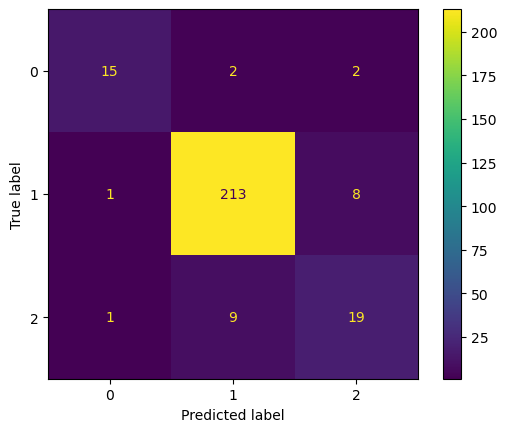

In [91]:
#Setting the confusion matrix variable 
cm = confusion_matrix(val_y, preds)

#Plotting confusion matrix
plot_confusion_matrix(rf_classifier, test_X, test_y)
plt.savefig('confusion_matrix_val.png')


#### Submission of model 

In [145]:
health_test = Health_test[wo_target]
pred_target = rf_classifier.predict(health_test)

In [146]:
# Reverting back to original labels
original_labels = label_encoder.inverse_transform(pred_target)

# Save to predictions ato file 
submission = pd.DataFrame({"id": Health_test["id"],"predicted_Target": original_labels})
submission.to_csv('predictedTarget.csv', index=False)

In [147]:
submission_head = submission.head()
submission_head.to_csv('submissionhead.csv', index=False)

# Part 4: Unsupervised Learning

## Data Exploration

In [106]:
health_x2 = Health_train_data[columns]
health_y2 = Health_train_data.target

## Pre-Processing

### Encoding

#### One-Hot Encoding x14

In [107]:
enc = OneHotEncoder(handle_unknown='ignore')

# Passing `enc` to the `x3` columns
b_enc_df = pd.DataFrame(enc.fit_transform(health_x2[['x14']]).toarray())
b_enc_df.columns = enc.get_feature_names(['B'])
print(b_enc_df)

#Adding the newly formed encoded x3 column to the original data
health_x2 = pd.concat([health_x2, b_enc_df], axis=1)
print(health_x2)

      B_A+  B_A-  B_AB+  B_AB-  B_B+  B_B-  B_O+  B_O-
0      0.0   0.0    0.0    0.0   0.0   0.0   1.0   0.0
1      1.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0
2      0.0   0.0    0.0    0.0   0.0   0.0   1.0   0.0
3      0.0   0.0    0.0    0.0   0.0   0.0   1.0   0.0
4      0.0   0.0    0.0    0.0   1.0   0.0   0.0   0.0
...    ...   ...    ...    ...   ...   ...   ...   ...
1579   0.0   0.0    0.0    0.0   0.0   1.0   0.0   0.0
1580   0.0   0.0    0.0    0.0   1.0   0.0   0.0   0.0
1581   0.0   0.0    0.0    0.0   0.0   0.0   0.0   1.0
1582   1.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0
1583   1.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0

[1584 rows x 8 columns]
        x1     x2 x3     x4     x5     x6     x7   x8     x9   x10  ...   x23  \
0     1406  145.0  F  0.005  0.000  0.002  0.000  0.0  0.000  46.0  ...   4.0   
1      258  127.0  M  0.012  0.000  0.008  0.004  0.0  0.000  13.0  ...  41.0   
2      479  145.0  F  0.000  0.000  0.000  0.002  0.0  0.000  57.0  ... 

/Users/miguelrosales/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [108]:
b_enc = b_enc_df.head()
b_enc.to_csv('b_enc.csv')

#### One-Hot Encoding 'x3'

In [109]:
enc = OneHotEncoder(handle_unknown='ignore')

# Passing `enc` to the `x3` columns
enc_df = pd.DataFrame(enc.fit_transform(health_x2[['x3']]).toarray())
enc_df.columns = enc.get_feature_names(['S'])
print(enc_df)

#Adding the newly formed encoded x3 column to the original data
health_x2 = pd.concat([health_x2, enc_df], axis=1)
health_x2

      S_F  S_M
0     1.0  0.0
1     0.0  1.0
2     1.0  0.0
3     1.0  0.0
4     1.0  0.0
...   ...  ...
1579  0.0  1.0
1580  1.0  0.0
1581  1.0  0.0
1582  1.0  0.0
1583  1.0  0.0

[1584 rows x 2 columns]


/Users/miguelrosales/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


x1     x2 x3     x4     x5     x6     x7   x8     x9   x10  ...  B_A+  \
0     1406  145.0  F  0.005  0.000  0.002  0.000  0.0  0.000  46.0  ...   0.0   
1      258  127.0  M  0.012  0.000  0.008  0.004  0.0  0.000  13.0  ...   1.0   
2      479  145.0  F  0.000  0.000  0.000  0.002  0.0  0.000  57.0  ...   0.0   
3      906  146.0  F  0.004  0.000  0.005  0.003  0.0  0.000  29.0  ...   0.0   
4     1921  140.0  F  0.002  0.003  0.006  0.006  0.0  0.000  62.0  ...   0.0   
...    ...    ... ..    ...    ...    ...    ...  ...    ...   ...  ...   ...   
1579  2077  130.0  M  0.005  0.001  0.001  0.000  0.0  0.000  72.0  ...   0.0   
1580   664  138.0  F  0.000  0.003  0.003  0.000  0.0  0.002  60.0  ...   0.0   
1581  1431  144.0  F  0.000  0.000  0.006  0.000  0.0  0.000  45.0  ...   0.0   
1582   630  134.0  F  0.017  0.002  0.004  0.000  0.0  0.000  48.0  ...   1.0   
1583   436  151.0  F  0.000  0.000  0.006  0.006  0.0  0.000  64.0  ...   1.0   

      B_A-  B_AB+ B_AB-  B_B+  B_B-  B_O+  B_O-  S_F  S_M  
0      0.0    0.0   0.0   0.0   0.0   1.0   0.0  1.0  0.0  
1      0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0  1.0  
2      0.0    0.0   0.0   0.0   0.0   1.0   0.0  1.0  0.0  
3      0.0    0.0   0.0   0.0   0.0   1.0   0.0  1.0  0.0  
4      0.0    0.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0  
...    ...    ...   ...   ...   ...   ...   ...  ...  ...  
1579   0.0    0.0   0.0   0.0   1.0   0.0   0.0  0.0  1.0  
1580   0.0    0.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0  
1581   0.0    0.0   0.0   0.0   0.0   0.0   1.0  1.0  0.0  
1582   0.0    0.0   0.0   0.0   0.0   0.0   0.0  1.0  0.0  
1583   0.0    0.0   0.0   0.0   0.0   0.0   0.0  1.0  0.0  

[1584 rows x 34 columns]

#### Dropping Categorical Columns

In [110]:
dropped_columns = ['x3', 'x14']
health_x2 = health_x2.drop(dropped_columns, axis=1)

In [111]:
health_x2

x1     x2     x4     x5     x6     x7   x8     x9   x10  x11  ...  \
0     1406  145.0  0.005  0.000  0.002  0.000  0.0  0.000  46.0  0.8  ...   
1      258  127.0  0.012  0.000  0.008  0.004  0.0  0.000  13.0  3.8  ...   
2      479  145.0  0.000  0.000  0.000  0.002  0.0  0.000  57.0  0.5  ...   
3      906  146.0  0.004  0.000  0.005  0.003  0.0  0.000  29.0  1.2  ...   
4     1921  140.0  0.002  0.003  0.006  0.006  0.0  0.000  62.0  1.6  ...   
...    ...    ...    ...    ...    ...    ...  ...    ...   ...  ...  ...   
1579  2077  130.0  0.005  0.001  0.001  0.000  0.0  0.000  72.0  0.9  ...   
1580   664  138.0  0.000  0.003  0.003  0.000  0.0  0.002  60.0  1.0  ...   
1581  1431  144.0  0.000  0.000  0.006  0.000  0.0  0.000  45.0  0.7  ...   
1582   630  134.0  0.017  0.002  0.004  0.000  0.0  0.000  48.0  2.2  ...   
1583   436  151.0  0.000  0.000  0.006  0.006  0.0  0.000  64.0  1.1  ...   

      B_A+  B_A-  B_AB+  B_AB-  B_B+  B_B-  B_O+  B_O-  S_F  S_M  
0      0.0   0.0    0.0    0.0   0.0   0.0   1.0   0.0  1.0  0.0  
1      1.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0  0.0  1.0  
2      0.0   0.0    0.0    0.0   0.0   0.0   1.0   0.0  1.0  0.0  
3      0.0   0.0    0.0    0.0   0.0   0.0   1.0   0.0  1.0  0.0  
4      0.0   0.0    0.0    0.0   1.0   0.0   0.0   0.0  1.0  0.0  
...    ...   ...    ...    ...   ...   ...   ...   ...  ...  ...  
1579   0.0   0.0    0.0    0.0   0.0   1.0   0.0   0.0  0.0  1.0  
1580   0.0   0.0    0.0    0.0   1.0   0.0   0.0   0.0  1.0  0.0  
1581   0.0   0.0    0.0    0.0   0.0   0.0   0.0   1.0  1.0  0.0  
1582   1.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0  1.0  0.0  
1583   1.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0  1.0  0.0  

[1584 rows x 32 columns]

#### Encoding Target

In [112]:
health_y2 = label_encoder.fit_transform(health_y2)

### Correlation Analysis

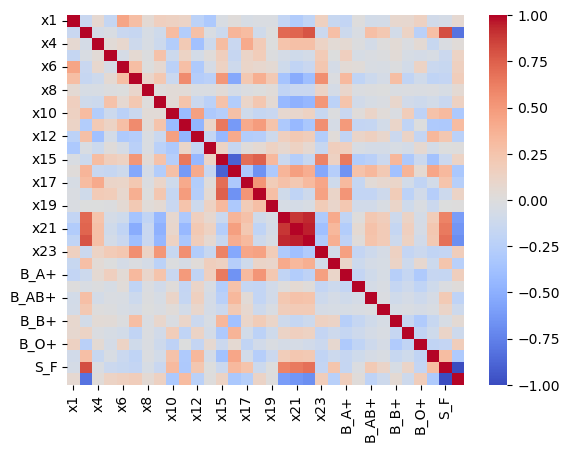

<Figure size 1200x1000 with 0 Axes>

In [113]:
health_corr = health_x2.corr()
heat = sns.heatmap(health_corr, annot=False, cmap='coolwarm')
plt.savefig('unsp_corr.png')
plt.figure(figsize=(12,10))
plt.show()

In [114]:
#Selecting highly correlated features
threshold = 0.80
high_corr_features = []

for feature in health_corr:
    correlated_features = health_corr[feature][(health_corr[feature] >= threshold) & (health_corr[feature] < 1)].index.tolist()
    high_corr_features.extend(correlated_features)

# Selecting Highly Correlated Features
high_corr_features= list(set(high_corr_features))

print(high_corr_features)

['x20', 'x2', 'x21', 'x22', 'S_F']


In [115]:
# Dropping Highly Correlated Features
health_no_corr = health_x2.drop(columns=high_corr_features)
health_no_corr

x1     x4     x5     x6     x7   x8     x9   x10  x11   x12  ...  x24  \
0     1406  0.005  0.000  0.002  0.000  0.0  0.000  46.0  0.8   0.0  ...  1.0   
1      258  0.012  0.000  0.008  0.004  0.0  0.000  13.0  3.8   0.0  ...  0.0   
2      479  0.000  0.000  0.000  0.002  0.0  0.000  57.0  0.5   0.0  ...  1.0   
3      906  0.004  0.000  0.005  0.003  0.0  0.000  29.0  1.2   1.0  ...  0.0   
4     1921  0.002  0.003  0.006  0.006  0.0  0.000  62.0  1.6   0.0  ...  0.0   
...    ...    ...    ...    ...    ...  ...    ...   ...  ...   ...  ...  ...   
1579  2077  0.005  0.001  0.001  0.000  0.0  0.000  72.0  0.9   8.0  ...  0.0   
1580   664  0.000  0.003  0.003  0.000  0.0  0.002  60.0  1.0   8.0  ...  0.0   
1581  1431  0.000  0.000  0.006  0.000  0.0  0.000  45.0  0.7   0.0  ...  0.0   
1582   630  0.017  0.002  0.004  0.000  0.0  0.000  48.0  2.2   0.0  ...  1.0   
1583   436  0.000  0.000  0.006  0.006  0.0  0.000  64.0  1.1  26.0  ...  1.0   

      B_A+  B_A-  B_AB+  B_AB-  B_B+  B_B-  B_O+  B_O-  S_M  
0      0.0   0.0    0.0    0.0   0.0   0.0   1.0   0.0  0.0  
1      1.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0  1.0  
2      0.0   0.0    0.0    0.0   0.0   0.0   1.0   0.0  0.0  
3      0.0   0.0    0.0    0.0   0.0   0.0   1.0   0.0  0.0  
4      0.0   0.0    0.0    0.0   1.0   0.0   0.0   0.0  0.0  
...    ...   ...    ...    ...   ...   ...   ...   ...  ...  
1579   0.0   0.0    0.0    0.0   0.0   1.0   0.0   0.0  1.0  
1580   0.0   0.0    0.0    0.0   1.0   0.0   0.0   0.0  0.0  
1581   0.0   0.0    0.0    0.0   0.0   0.0   0.0   1.0  0.0  
1582   1.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0  0.0  
1583   1.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0  0.0  

[1584 rows x 27 columns]

### PCA

In [133]:
# Initialise PCA function
k = 6
pca = PCA(n_components = k)

# Fitting PCA to train data
pca.fit(health_clus)

PCA(n_components=6)

Explained variances: [6.03746994e-01 2.81235897e-01 1.14714774e-01 3.02326207e-04
 8.52495565e-09 1.67933751e-10]
Cumalative variances: [0.60374699 0.88498289 0.99969767 0.99999999 1.         1.        ]


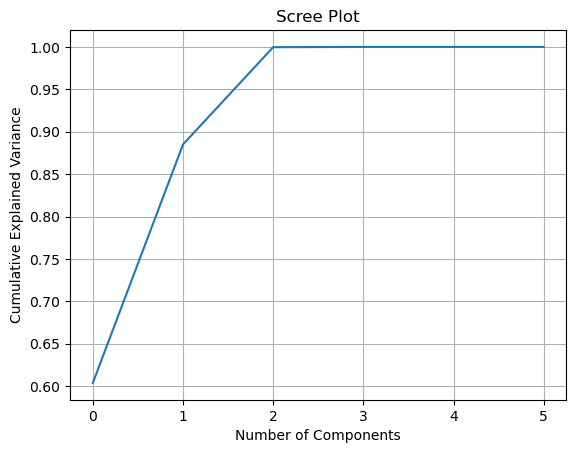

In [134]:
###### Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("Explained variances:", explained_variance)
print("Cumalative variances:", cumulative_variance)

# Scree plot to determine n_components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.savefig('scree_plot_PCA.png')
plt.show()

In [124]:
# Transforming Data
prepro_clus_train = pca.transform(health_no_corr)
prepro_clus_train.shape

(1584, 10)

## Clustering Methods

### K-Means

#### Elbow Method

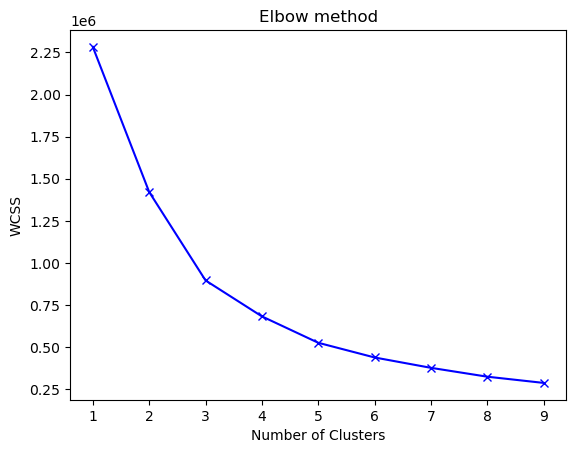

In [135]:
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(health_clus) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia, 'bx-')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('K-means, Elbow Method.png')
plt.show()

#### Silhouette Method

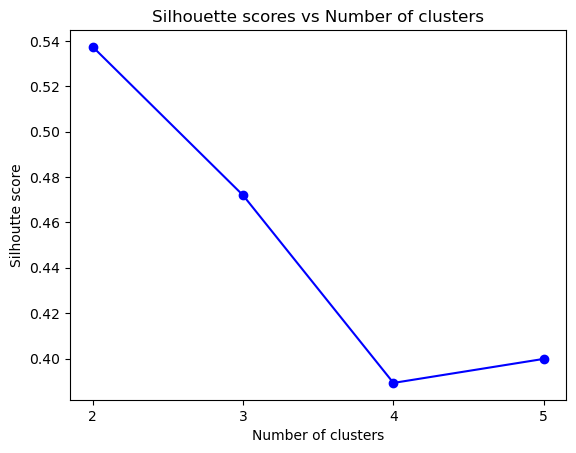

In [136]:
silhoutte_scores = [silhouette_score(health_clus, model.labels_) for model in kmeans_models[1:5]]
plt.plot(range(2,6), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4, 5])
plt.title('Silhouette scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.savefig('K-Means - Silhouette.png')
plt.show()

### Fitting

In [137]:
kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(health_clus)
labels_pred = kmeans.predict(health_clus)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

### Scoring 

In [138]:
print('Silhoutte score: ' + str(silhouette_score(health_clus, kmeans.labels_)))
inertia_score = kmeans.inertia_
print('Inertia score: ', inertia_score)

Silhoutte score: 0.537304978125254
Inertia score:  1421197.2798524278


### Visualsing

In [148]:
plt.figure(figsize=(10,6))
fig=px.scatter(health_clus,x='x10', y='x23', color=labels)
fig.show()

<Figure size 1000x600 with 0 Axes>